# Tarea 1 - Parte 1
# INF477 Redes Neuronales Artificiales I-2018

Profesor: Dr. Ricardo Ñanculef -- 
Ayudante: Francisco Mena

Alumnos:
- Jose Caimapo, jose.caimapo.12@sansano.usm.cl

- Eliana Providel Godoy, eprovide@inf.utfsm.cl

<a id="primero"></a>
## 1. Predicción del precio de una Casa

#### a) Construcción del dataframe.  La variable CHAS se convierte a un vector binario de dos componenetes de acuerdo a las dos posibilidades de su valor. 

In [23]:
import numpy as np
import pandas as pd
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df = pd.get_dummies(df,columns=["CHAS"]) #to categorical
from sklearn.cross_validation import train_test_split
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
CHAS_0     506 non-null uint8
CHAS_1     506 non-null uint8
dtypes: float64(9), int64(4), uint8(2)
memory usage: 52.5 KB


CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.347826   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.310593    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677082   12.000000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         RAD         TAX     PTRATIO           B       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.795043    9.549407  408.237154   18.083004  356.674032   12.653063   
std      2.105710    8.707259  168.537116    2.280574   91.294864    7.141062   
min      1.129600    1.000000  187.000000   12.000000    0.320000    1.730000   
25%      2.100175    4.000000  279.000000   17.000000  375.377500    6.950000   
50%      3.207450    5.000000  330.000000   19.000000  391.440000   11.360000   
75%      5.188425   24.000000  666.000000   20.000000  396.225000   16.955000   
max     12.126500   24.000000  711.000000   22.000000  396.900000   37.970000   

             MEDV      CHAS_0      CHAS_1  
count  506.000000  506.000000  506.000000  
mean    22.532806    0.930830    0.069170  
std      9.197104    0.253994    0.253994  
min      5.000000    0.000000    0.000000  
25%     17.025000    1.000000    0.000000  
50%     21.200000    1.000000    0.000000  
75%     25.000000    1.000000    0.000000  
max     50.000000    1.000000    1.000000

** Conveniencia de convertir la variable CHAS a un vector binario **

La variable CHAS se convierte a un vector binario de dos componentes de acuerdo a los valores que puede tomar, esto es últil por el desempeño, dado que se evita todo tipo de comparaciones usando if y por lo tanto es más conveniente para ser tratado como un elemento de álegra líneal.
También puede ser más fácil para el aprendizaje por la representación de sus valor (es como un vector onehot).

** Descripción del data set **

*Título*: Boston Housing Data

*Fuente*: Sources: (a) Origin: This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. (b) Creator: Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81\-102, 1978. (c) Date: July 7, 1993

*Número de instancias*: 506

*Número de atributos*: 13 atributos continuos (incluye el atributo de clase "MEDV") y 1 atributos binario.

*Información de los atributos:*

- CRIM Tasa de crimenes percapita por ciudad. \- tipo: Numerics
- ZN Proporción de terreno residencial zonificado para lotes sobre  25,000 sq.ft. \- tipo: Numerics
- INDUS Proporción de acres de negocios no-retail por ciudad. \- tipo: Numerics
- CHAS Variable dummy del río Charles ( 1 si esta al borde del río, 0 en otro caso) \- tipo: Nominal 0,1
- NOX Concentración de oxido nitrico  (partes por 10 millones)  \- tipo: Numerics
- RM Promedio de numero de habitaciones  por vivienda.  \- tipo: Numerics
- AGE Proporción de unidades ocupadas por el dueño y construídas antes de 1940.  \- tipo: Numerics
- DIS Distancias ponderadas a los 5 centros de empleo de Boston.  \- tipo: Numerics
- RAD Índice de accesibilidad a autopistas radiales.  \- tipo: Numerics
- TAX Valor total de la tasa de impuestos a la propiedad por cada 10.000 dolares.  \- tipo: Numerics
- PTRATIO Tasa de alumnos/profesor por ciudad.  \- tipo: Numerics

- B 1000(Bk - 0.63)^2  Coeficiente en relación a la gente negra por ciudad.  \- tipo: Numerics
- LSTAT  Estatus mas bajo de la población   \- tipo: Numerics
- MEDV Mediana de los hogares ocupados por sus dueños en miles de dolares.  \- tipo: Numerics


ref: http://mldata.org/repository/data/viewslug/regression-datasets-housing/

** Normalizando los datos ** (de acuerdo al enunciado)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train), columns = df_train.columns)
y_train_scaled = df_train.pop('MEDV')

scaler =  StandardScaler().fit(df_test)
X_test_scaled = pd.DataFrame(scaler.transform(df_test), columns = df_test.columns)
y_test_scaled = df_test.pop('MEDV')

In [25]:
y_train_scaled = y_train_scaled.values.reshape(-1,1)
y_test_scaled = y_test_scaled.values.reshape(-1,1)

### b) y c) Gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de epochs de entrenamiento.

** General para conjunto de entrenamiento y prueba:**
- red feedforward de 3 capas
- 200 unidades ocultas
- función de activación sigmoidal (punto b) y Relu (c). 
- Entrenamiento de  la red usando gradiente descendente estocástico, tasa de aprendizaje 0.01
- 300 epochs de entrenamiento

In [40]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

#se fija una semilla para poder generar una comparación
seed = 18
np.random.seed(seed)

#### Funciones que se utilizan####

## Función para crear el modelo, variando, principalmente la función de antivación para Sigmoid y Relu
def create_model(activation, optimizer = 'adam', f_loss = 'mean_squared_error'):
    # create model
    print("\nModelo con params: {0}, {1}, {2}.".format(activation,f_loss,optimizer))
    model = Sequential()  
    model.add(Dense(200, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation=activation))
    # output layer
    model.add(Dense(1, kernel_initializer='uniform', activation = 'linear'))
    model.compile(optimizer = optimizer, loss = f_loss , metrics=['accuracy']) ## accuracy no debiese estar
    return model

## Función para gráficar
import matplotlib.pyplot as plt
def plot_data(loss,val_loss,acc,val_acc):
    plt.close('all')

    f, axarr = plt.subplots(2, sharex=True,figsize=(8,8))
    axarr[0].set_title('MSE vs Epoch')
    axarr[0].plot(loss)
    axarr[0].plot(val_loss)
    axarr[0].set_xlabel('epoch')
    axarr[0].set_ylabel('mse')
    #plt.ylim(ymin=0, ymax=1)
    
    axarr[1].set_title('Acc vs Epoch')
    axarr[1].plot(acc)
    axarr[1].plot(val_acc)
    axarr[1].set_xlabel('epoch')
    axarr[1].set_ylabel('acc')
    #plt.ylim(ymin=0, ymax=1)

    axarr[1].legend(['entrenamiento', 'prueba'], loc='upper right')
    axarr[0].legend(['entrenamiento', 'prueba'], loc='upper right')
    
    plt.show()

** Utilizando la función de activación Sigmoid (punto b) y Relu (punto c) **

In [41]:
seed = 18
np.random.seed(seed)

## Fijando la tasa de aprendizaje
sgd = SGD(lr = 0.01)

#modelob 1 / FF 3 Capas I/H/O 200 neuronas en la oculta a/sigmoide
#sgd lr 0.01 epochs 300
#modeloc 2 / Igual al uno pero a/ReLu
history = []
activation = ['sigmoid','relu']

for a in activation:
    model = create_model(a,sgd)
    history.append(model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix())))
    


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a413e45c0>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a413e45c0>.


** Gráficos para la función de Activación Sigmoid y Relu **

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

			     Sigmoid


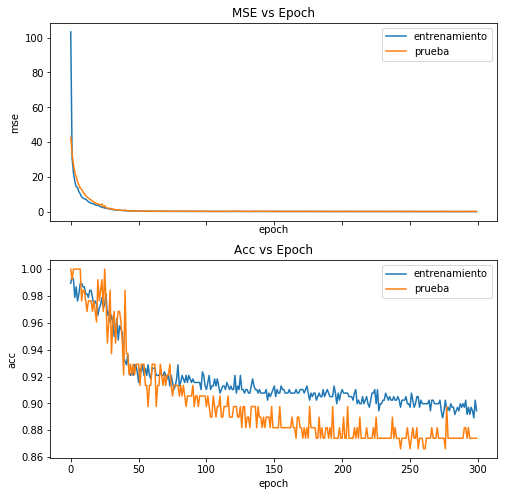


			     Relu


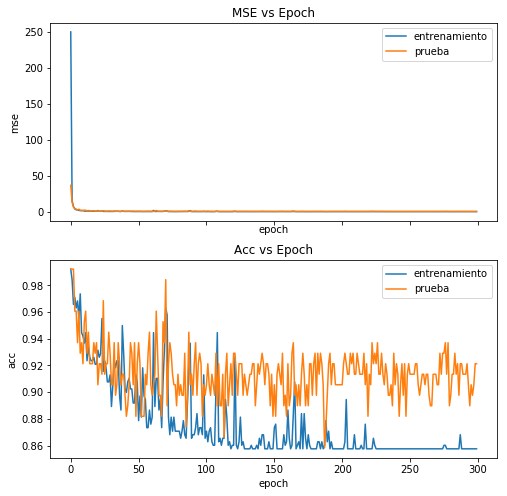

In [49]:
##Los valores de history
print(history[0].history.keys())
print(history[1].history.keys())

##Para graficar
for i in range(2):    
    if i == 0:
        print ('\n\t\t\t     Sigmoid')
    else:
        print ('\n\t\t\t     Relu')
    
    plot_data(
        history[i].history['loss'],
        history[i].history['val_loss'],
        list(map(lambda x: 1 - x, history[i].history['acc'])),
        list(map(lambda x: 1 - x, history[i].history['val_acc']))
    )
    

** Comentarios**

**Con respecto a la divergencia**

Para MSE no se observa divergencia, dado que rapidamente los valores de  MSE tiende a 0, tanto para la función de activación Sigmoid y Relu. Para el caso de Sigmoid esto ocurre antes de los 50 epochs. Para el caso de Relu es mucho más rápido, produciendose en los primeros epochs.


** Describiendo comportamiento para Sigmoid y Relu, de acuerdo a valores de MSE, finalizando con la comparación**

En el caso de la función de activación Sigmoid, los valores de MSE para el conjunto de entrenamiento comienzan cercano a 110, y para el conjunto de prueba parten  con calores cercano a 45.  Junto con esto , el conjunto de entrenamiento  aproximadamente en los 25 primeros epochs tiene valores que están levemente por debajo del conjunto de prueba, luego ambos conjuntos mantienen el mismo comportamiento.

Para el caso de la función de activación Relu, los valores de MSE para el conjunto de entrenamiento, los valores de MSE para el conjunto de entrenamiento comienzan cercano a 250, y para el conjunto de prueba parten aproximadamente en 45. 
Para los casos de prueba y de entrenamiento, el comportamiento es muy similar, varian prácticamente sólo en el valor inicial de MSE.

A modo general, se observa que la función de activación Relu tiene valores más pequeños en menor cantidad de número de Epochs que la función de activación Relu.


**Con respecto al valor de Accuracy, asociado al error de clasificación**
- Dado que es 1 cuando la máquina se equivoca y 0 cuando acierta, se gráfica 1-history['acc'].
- La función de activación Sigmoid tiene valores de error de clasificación (1-acc),  para el conjunto de enrenamiento sobre de los valores del conjunto de prueba al llegar a los 300 epochs. El conjunto de prueba alcanza valores cercanos a 0.88 y el conjunto de entrenamiento valores alrededor de 0.90.

- Para la función de activación Relu, el conjunto de prueba tiene valores de  error de clasificación (1-acc) que estan por sobre los valores del conjunto de entrenamiento, los valores de error de clasificación en los 300 Epochs son 0.86 para el conjunto de entrenamiento  y alrededor de 0.92 para el conjunto de prueba.

- En ambas funciones, se observan oscilaciones, siendo mayores para el caso de la función Relu.



### d)  Variando la tasa de aprendizaje en un rango sensible, se repite para los puntos b) y c)



 Modelos con lr de, 0.001

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a53b15358>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a54b3d9e8>.


 Modelos con lr de, 0.0032500000000000003

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a5566d278>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a559c8a90>.


 Modelos con lr de, 0.0055000000000000005

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a55abd588>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a55b41a20>.


 Modelos con lr de, 0.007750000000000001

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a52081208>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a569fa9b0>.


 Modelos con lr de, 0.01

Modelo con params: sigmoid, mean_squared_error, <keras.op

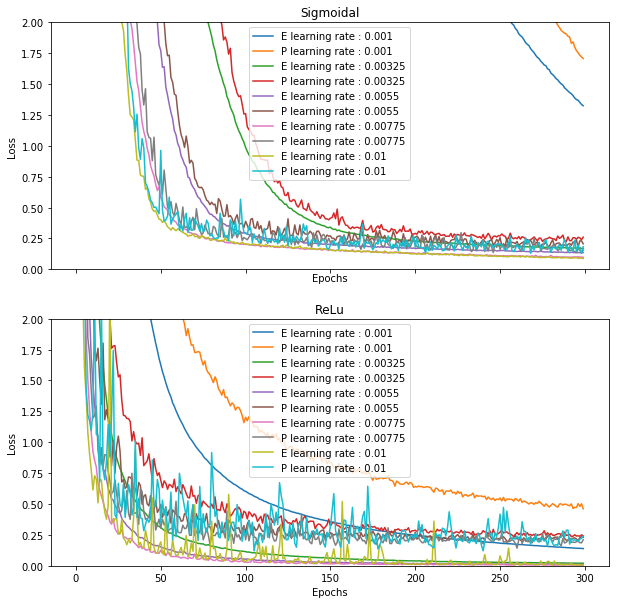

In [69]:
#n_lr = 20
#lear_rate = np.linspace(0,1,n_lr)
#lear_rate

#se fija una semilla para poder generar una comparación
seed = 18
np.random.seed(seed)

plt.close('all')

f, axarr = plt.subplots(2, sharex=True,sharey =True,figsize=(10,10))

history = []
activation = ['sigmoid','relu']
n_lr = 5
lear_rate = np.linspace(0.001,0.01,n_lr)
lear_rate
for l_r in lear_rate:
    print("\n\n Modelos con lr de, {0}".format(l_r))
    for a in activation:
        sgd = SGD(lr = l_r)
        model = create_model(a,sgd)
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], label = "E learning rate : "+str(l_r))
            axarr[0].plot(hisx.history['val_loss'], label = "P learning rate : "+str(l_r))
        else:
            axarr[1].plot(hisx.history['loss'], label = "E learning rate : "+str(l_r))
            axarr[1].plot(hisx.history['val_loss'], label = "P learning rate : "+str(l_r))
            
print("\n\n\nE: Conjunto de Entrenamiento, P: Conjunto de Prueba\n")            
axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[0].set_title('Sigmoidal')
axarr[1].set_title('ReLu')
axarr[0].set_ylim(0,2)
axarr[1].set_ylim(0,2)
axarr[0].legend(loc='upper center')
axarr[1].legend(loc='upper center')
plt.show()

** Comentarios **

- Para los valores de learning_rate presentados en el enunciado,  entregaban como resultados valores nan (not a number), desde el segundo valor que es l_r = 0.05263158. En el caso de l_r = 0, las variables loss y val_loss se mantienen con el mismo valor durante toda la ejecución.
Esto esta asociado al optimizador y la funcion de perdida, en general sgd con un learning rate muy alto se dispara (provocando los valores descritos) y con un valor de learning rate muy bajo no explora mucho.
Dado esto, es que se decidio probar con otros valores de learning rate, que son los descritos en el gráfico. Se consideraron 5 valores entre 0.001 y 0.01 . 

--- Conjunto  de entrenamiento
*	Para ambas funciones de activación, el mejor resultado se obtiene con l_r = 0.01 seguido por l_r = 0.00775.
*	El en caso de Relu tiene un descenso más rapido que con Sigmoid. Para el primer los valores de mse llegan cercano a 0 antes de los 100 epochs, para el caso de Sigmoid no se logra en los 300 epochos (a pesar de tener valores muy pequeños para mse).
*	En el caso de Sigmoid y Relu, las oscilaciones son mínimas.

--- Conjunto de Prueba
*	Para sigmoid el mejor resultado se obtiene con l_r = 0.01, seguido de lr_ l_r = 0.00775. Sin embargo los valores estan por sobre los del conjutno de entrenamiento.
*	Las oscilaciones que se presentan para estos valores son mayores que las del conjunto de entrenamiento.
*	Para el caso de relu, los resultados son muy similares cuando l_r = 0.01, 0.00755 y 0.0055.
*	Para Sigmoid y Relu, se presentan oscilaciones, que son notorias (a diferencia de los resultados obtenidos en el conjunto de entrenamiento)


Un valor que se puede destacar, en ambos conjunto de prueba, es cuando l_r = 0.001, dado el comportamiento diferente que presentan ambas funciones. Para el caso de Sigmoid los valores de MSE no bajan de 125 al llegar a los 300 epochos. Siendo que en el caso de Relu en los 300 epochs los valores de MSE estan cercanos a 0.25. Siendo siempre mejor el para el conjunto de entrenamiento.


### e) Se entrenand los modelos de b) y c) usando progresive decay.



Modelos con lr de, 1e-06

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a626fc940>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 11s 28ms/step - loss: 590.8067 - acc: 0.0000e+00 - val_loss: 573.0377 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 237us/step - loss: 589.5724 - acc: 0.0000e+00 - val_loss: 571.8215 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 241us/step - loss: 588.3412 - acc: 0.0000e+00 - val_loss: 570.6086 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 254us/step - loss: 587.1135 - acc: 0.0000e+00 - val_loss: 569.3993 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 230us/step - loss: 585.8892 - acc: 0.0000e+00 - val_loss: 568.1943 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 234us/step - loss: 584.6690 - acc: 0.0

379/379 [==============================] - 0s 228us/step - loss: 472.5590 - acc: 0.0000e+00 - val_loss: 456.6287 - val_acc: 0.0000e+00
Epoch 111/300
379/379 [==============================] - 0s 233us/step - loss: 471.6130 - acc: 0.0000e+00 - val_loss: 455.6991 - val_acc: 0.0000e+00
Epoch 112/300
379/379 [==============================] - 0s 223us/step - loss: 470.6699 - acc: 0.0000e+00 - val_loss: 454.7712 - val_acc: 0.0000e+00
Epoch 113/300
379/379 [==============================] - 0s 225us/step - loss: 469.7288 - acc: 0.0000e+00 - val_loss: 453.8472 - val_acc: 0.0000e+00
Epoch 114/300
379/379 [==============================] - 0s 230us/step - loss: 468.7912 - acc: 0.0000e+00 - val_loss: 452.9237 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 239us/step - loss: 467.8546 - acc: 0.0000e+00 - val_loss: 452.0033 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 228us/step - loss: 466.9207 - acc: 0.0000e+00 - val_loss: 45

379/379 [==============================] - 0s 221us/step - loss: 423.7995 - acc: 0.0000e+00 - val_loss: 408.7049 - val_acc: 0.0000e+00
Epoch 166/300
379/379 [==============================] - 0s 252us/step - loss: 422.9722 - acc: 0.0000e+00 - val_loss: 407.8925 - val_acc: 0.0000e+00
Epoch 167/300
379/379 [==============================] - 0s 234us/step - loss: 422.1471 - acc: 0.0000e+00 - val_loss: 407.0823 - val_acc: 0.0000e+00
Epoch 168/300
379/379 [==============================] - 0s 229us/step - loss: 421.3244 - acc: 0.0000e+00 - val_loss: 406.2748 - val_acc: 0.0000e+00
Epoch 169/300
379/379 [==============================] - 0s 235us/step - loss: 420.5041 - acc: 0.0000e+00 - val_loss: 405.4682 - val_acc: 0.0000e+00
Epoch 170/300
379/379 [==============================] - 0s 229us/step - loss: 419.6850 - acc: 0.0000e+00 - val_loss: 404.6649 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 234us/step - loss: 418.8690 - acc: 0.0000e+00 - val_loss: 40

379/379 [==============================] - 0s 230us/step - loss: 343.1862 - acc: 0.0053 - val_loss: 329.6169 - val_acc: 0.0000e+00
Epoch 277/300
379/379 [==============================] - 0s 242us/step - loss: 342.5552 - acc: 0.0053 - val_loss: 328.9979 - val_acc: 0.0000e+00
Epoch 278/300
379/379 [==============================] - 0s 237us/step - loss: 341.9248 - acc: 0.0053 - val_loss: 328.3793 - val_acc: 0.0000e+00
Epoch 279/300
379/379 [==============================] - 0s 227us/step - loss: 341.2950 - acc: 0.0053 - val_loss: 327.7619 - val_acc: 0.0000e+00
Epoch 280/300
379/379 [==============================] - 0s 219us/step - loss: 340.6665 - acc: 0.0053 - val_loss: 327.1475 - val_acc: 0.0000e+00
Epoch 281/300
379/379 [==============================] - 0s 228us/step - loss: 340.0405 - acc: 0.0053 - val_loss: 326.5346 - val_acc: 0.0000e+00
Epoch 282/300
379/379 [==============================] - 0s 227us/step - loss: 339.4166 - acc: 0.0053 - val_loss: 325.9246 - val_acc: 0.0000e+00

Epoch 31/300
379/379 [==============================] - 0s 244us/step - loss: 593.0133 - acc: 0.0000e+00 - val_loss: 576.0048 - val_acc: 0.0000e+00
Epoch 32/300
379/379 [==============================] - 0s 229us/step - loss: 592.9732 - acc: 0.0000e+00 - val_loss: 575.9658 - val_acc: 0.0000e+00
Epoch 33/300
379/379 [==============================] - 0s 224us/step - loss: 592.9333 - acc: 0.0000e+00 - val_loss: 575.9267 - val_acc: 0.0000e+00
Epoch 34/300
379/379 [==============================] - 0s 238us/step - loss: 592.8932 - acc: 0.0000e+00 - val_loss: 575.8876 - val_acc: 0.0000e+00
Epoch 35/300
379/379 [==============================] - 0s 224us/step - loss: 592.8531 - acc: 0.0000e+00 - val_loss: 575.8486 - val_acc: 0.0000e+00
Epoch 36/300
379/379 [==============================] - 0s 227us/step - loss: 592.8131 - acc: 0.0000e+00 - val_loss: 575.8096 - val_acc: 0.0000e+00
Epoch 37/300
379/379 [==============================] - 0s 232us/step - loss: 592.7732 - acc: 0.0000e+00 - val_l

379/379 [==============================] - 0s 222us/step - loss: 588.5783 - acc: 0.0000e+00 - val_loss: 571.6842 - val_acc: 0.0000e+00
Epoch 142/300
379/379 [==============================] - 0s 237us/step - loss: 588.5377 - acc: 0.0000e+00 - val_loss: 571.6446 - val_acc: 0.0000e+00
Epoch 143/300
379/379 [==============================] - 0s 232us/step - loss: 588.4970 - acc: 0.0000e+00 - val_loss: 571.6051 - val_acc: 0.0000e+00
Epoch 144/300
379/379 [==============================] - 0s 230us/step - loss: 588.4564 - acc: 0.0000e+00 - val_loss: 571.5655 - val_acc: 0.0000e+00
Epoch 145/300
379/379 [==============================] - 0s 235us/step - loss: 588.4156 - acc: 0.0000e+00 - val_loss: 571.5260 - val_acc: 0.0000e+00
Epoch 146/300
379/379 [==============================] - 0s 230us/step - loss: 588.3750 - acc: 0.0000e+00 - val_loss: 571.4864 - val_acc: 0.0000e+00
Epoch 147/300
379/379 [==============================] - 0s 242us/step - loss: 588.3344 - acc: 0.0000e+00 - val_loss: 57

379/379 [==============================] - 0s 233us/step - loss: 586.3303 - acc: 0.0000e+00 - val_loss: 569.4979 - val_acc: 0.0000e+00
Epoch 197/300
379/379 [==============================] - 0s 227us/step - loss: 586.2892 - acc: 0.0000e+00 - val_loss: 569.4580 - val_acc: 0.0000e+00
Epoch 198/300
379/379 [==============================] - 0s 235us/step - loss: 586.2481 - acc: 0.0000e+00 - val_loss: 569.4180 - val_acc: 0.0000e+00
Epoch 199/300
379/379 [==============================] - 0s 229us/step - loss: 586.2069 - acc: 0.0000e+00 - val_loss: 569.3780 - val_acc: 0.0000e+00
Epoch 200/300
379/379 [==============================] - 0s 233us/step - loss: 586.1658 - acc: 0.0000e+00 - val_loss: 569.3381 - val_acc: 0.0000e+00
Epoch 201/300
379/379 [==============================] - 0s 230us/step - loss: 586.1247 - acc: 0.0000e+00 - val_loss: 569.2980 - val_acc: 0.0000e+00
Epoch 202/300
379/379 [==============================] - 0s 229us/step - loss: 586.0835 - acc: 0.0000e+00 - val_loss: 56

379/379 [==============================] - 0s 235us/step - loss: 584.0550 - acc: 0.0000e+00 - val_loss: 567.2878 - val_acc: 0.0000e+00
Epoch 252/300
379/379 [==============================] - 0s 240us/step - loss: 584.0133 - acc: 0.0000e+00 - val_loss: 567.2475 - val_acc: 0.0000e+00
Epoch 253/300
379/379 [==============================] - 0s 231us/step - loss: 583.9717 - acc: 0.0000e+00 - val_loss: 567.2071 - val_acc: 0.0000e+00
Epoch 254/300
379/379 [==============================] - 0s 225us/step - loss: 583.9301 - acc: 0.0000e+00 - val_loss: 567.1667 - val_acc: 0.0000e+00
Epoch 255/300
379/379 [==============================] - 0s 242us/step - loss: 583.8884 - acc: 0.0000e+00 - val_loss: 567.1262 - val_acc: 0.0000e+00
Epoch 256/300
379/379 [==============================] - 0s 231us/step - loss: 583.8467 - acc: 0.0000e+00 - val_loss: 567.0857 - val_acc: 0.0000e+00
Epoch 257/300
379/379 [==============================] - 0s 223us/step - loss: 583.8050 - acc: 0.0000e+00 - val_loss: 56

Epoch 5/300
379/379 [==============================] - 0s 225us/step - loss: 565.5997 - acc: 0.0000e+00 - val_loss: 545.8813 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 238us/step - loss: 560.1613 - acc: 0.0000e+00 - val_loss: 540.5561 - val_acc: 0.0000e+00
Epoch 7/300
379/379 [==============================] - 0s 227us/step - loss: 554.7859 - acc: 0.0000e+00 - val_loss: 535.2843 - val_acc: 0.0000e+00
Epoch 8/300
379/379 [==============================] - 0s 237us/step - loss: 549.4655 - acc: 0.0000e+00 - val_loss: 530.0732 - val_acc: 0.0000e+00
Epoch 9/300
379/379 [==============================] - 0s 229us/step - loss: 544.2051 - acc: 0.0000e+00 - val_loss: 524.9229 - val_acc: 0.0000e+00
Epoch 10/300
379/379 [==============================] - 0s 229us/step - loss: 539.0058 - acc: 0.0000e+00 - val_loss: 519.8294 - val_acc: 0.0000e+00
Epoch 11/300
379/379 [==============================] - 0s 246us/step - loss: 533.8644 - acc: 0.0000e+00 - val_loss: 

Epoch 61/300
379/379 [==============================] - 0s 238us/step - loss: 338.6927 - acc: 0.0026 - val_loss: 324.0988 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 248us/step - loss: 335.8094 - acc: 0.0053 - val_loss: 321.2882 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 240us/step - loss: 332.9555 - acc: 0.0053 - val_loss: 318.5038 - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 245us/step - loss: 330.1293 - acc: 0.0053 - val_loss: 315.7550 - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 249us/step - loss: 327.3371 - acc: 0.0053 - val_loss: 313.0299 - val_acc: 0.0000e+00
Epoch 66/300
379/379 [==============================] - 0s 241us/step - loss: 324.5711 - acc: 0.0053 - val_loss: 310.3431 - val_acc: 0.0000e+00
Epoch 67/300
379/379 [==============================] - 0s 247us/step - loss: 321.8424 - acc: 0.0053 - val_loss: 307.6839 - val_acc: 0.0

Epoch 117/300
379/379 [==============================] - 0s 205us/step - loss: 217.8549 - acc: 0.0026 - val_loss: 206.7929 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 215us/step - loss: 216.3061 - acc: 0.0026 - val_loss: 205.3021 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 234us/step - loss: 214.7795 - acc: 0.0026 - val_loss: 203.8264 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 253us/step - loss: 213.2687 - acc: 0.0026 - val_loss: 202.3666 - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 253us/step - loss: 211.7727 - acc: 0.0026 - val_loss: 200.9260 - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 247us/step - loss: 210.2963 - acc: 0.0026 - val_loss: 199.4999 - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 228us/step - loss: 208.8340 - acc: 0.0026 - val_loss: 198.0880 - val_a

379/379 [==============================] - 0s 243us/step - loss: 117.2283 - acc: 0.0000e+00 - val_loss: 110.6872 - val_acc: 0.0079
Epoch 231/300
379/379 [==============================] - 0s 223us/step - loss: 116.7729 - acc: 0.0000e+00 - val_loss: 110.2626 - val_acc: 0.0079
Epoch 232/300
379/379 [==============================] - 0s 240us/step - loss: 116.3233 - acc: 0.0000e+00 - val_loss: 109.8419 - val_acc: 0.0079
Epoch 233/300
379/379 [==============================] - 0s 238us/step - loss: 115.8781 - acc: 0.0000e+00 - val_loss: 109.4296 - val_acc: 0.0079
Epoch 234/300
379/379 [==============================] - 0s 238us/step - loss: 115.4403 - acc: 0.0000e+00 - val_loss: 109.0197 - val_acc: 0.0079
Epoch 235/300
379/379 [==============================] - 0s 240us/step - loss: 115.0056 - acc: 0.0000e+00 - val_loss: 108.6159 - val_acc: 0.0079
Epoch 236/300
379/379 [==============================] - 0s 231us/step - loss: 114.5775 - acc: 0.0000e+00 - val_loss: 108.2164 - val_acc: 0.0079

Epoch 287/300
379/379 [==============================] - 0s 237us/step - loss: 97.5645 - acc: 0.0026 - val_loss: 92.5394 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 245us/step - loss: 97.3105 - acc: 0.0026 - val_loss: 92.3088 - val_acc: 0.0000e+00
Epoch 289/300
379/379 [==============================] - 0s 247us/step - loss: 97.0590 - acc: 0.0026 - val_loss: 92.0805 - val_acc: 0.0000e+00
Epoch 290/300
379/379 [==============================] - 0s 230us/step - loss: 96.8099 - acc: 0.0053 - val_loss: 91.8543 - val_acc: 0.0000e+00
Epoch 291/300
379/379 [==============================] - 0s 237us/step - loss: 96.5625 - acc: 0.0053 - val_loss: 91.6286 - val_acc: 0.0000e+00
Epoch 292/300
379/379 [==============================] - 0s 234us/step - loss: 96.3149 - acc: 0.0053 - val_loss: 91.4062 - val_acc: 0.0000e+00
Epoch 293/300
379/379 [==============================] - 0s 248us/step - loss: 96.0717 - acc: 0.0053 - val_loss: 91.1871 - val_acc: 0.0000e+00

Epoch 42/300
379/379 [==============================] - 0s 289us/step - loss: 589.1177 - acc: 0.0000e+00 - val_loss: 571.8821 - val_acc: 0.0000e+00
Epoch 43/300
379/379 [==============================] - 0s 297us/step - loss: 588.9414 - acc: 0.0000e+00 - val_loss: 571.7093 - val_acc: 0.0000e+00
Epoch 44/300
379/379 [==============================] - 0s 273us/step - loss: 588.7655 - acc: 0.0000e+00 - val_loss: 571.5367 - val_acc: 0.0000e+00
Epoch 45/300
379/379 [==============================] - 0s 278us/step - loss: 588.5895 - acc: 0.0000e+00 - val_loss: 571.3638 - val_acc: 0.0000e+00
Epoch 46/300
379/379 [==============================] - 0s 269us/step - loss: 588.4134 - acc: 0.0000e+00 - val_loss: 571.1901 - val_acc: 0.0000e+00
Epoch 47/300
379/379 [==============================] - 0s 304us/step - loss: 588.2364 - acc: 0.0000e+00 - val_loss: 571.0167 - val_acc: 0.0000e+00
Epoch 48/300
379/379 [==============================] - 0s 279us/step - loss: 588.0598 - acc: 0.0000e+00 - val_l

379/379 [==============================] - 0s 271us/step - loss: 568.6757 - acc: 0.0000e+00 - val_loss: 551.8760 - val_acc: 0.0000e+00
Epoch 153/300
379/379 [==============================] - 0s 260us/step - loss: 568.4740 - acc: 0.0000e+00 - val_loss: 551.6789 - val_acc: 0.0000e+00
Epoch 154/300
379/379 [==============================] - 0s 274us/step - loss: 568.2713 - acc: 0.0000e+00 - val_loss: 551.4818 - val_acc: 0.0000e+00
Epoch 155/300
379/379 [==============================] - 0s 286us/step - loss: 568.0685 - acc: 0.0000e+00 - val_loss: 551.2842 - val_acc: 0.0000e+00
Epoch 156/300
379/379 [==============================] - 0s 255us/step - loss: 567.8651 - acc: 0.0000e+00 - val_loss: 551.0857 - val_acc: 0.0000e+00
Epoch 157/300
379/379 [==============================] - 0s 259us/step - loss: 567.6611 - acc: 0.0000e+00 - val_loss: 550.8867 - val_acc: 0.0000e+00
Epoch 158/300
379/379 [==============================] - 0s 271us/step - loss: 567.4563 - acc: 0.0000e+00 - val_loss: 55

379/379 [==============================] - 0s 245us/step - loss: 556.7985 - acc: 0.0000e+00 - val_loss: 540.3465 - val_acc: 0.0000e+00
Epoch 208/300
379/379 [==============================] - 0s 246us/step - loss: 556.5663 - acc: 0.0000e+00 - val_loss: 540.1220 - val_acc: 0.0000e+00
Epoch 209/300
379/379 [==============================] - 0s 305us/step - loss: 556.3336 - acc: 0.0000e+00 - val_loss: 539.8957 - val_acc: 0.0000e+00
Epoch 210/300
379/379 [==============================] - 0s 308us/step - loss: 556.0989 - acc: 0.0000e+00 - val_loss: 539.6696 - val_acc: 0.0000e+00
Epoch 211/300
379/379 [==============================] - 0s 308us/step - loss: 555.8643 - acc: 0.0000e+00 - val_loss: 539.4426 - val_acc: 0.0000e+00
Epoch 212/300
379/379 [==============================] - 0s 249us/step - loss: 555.6286 - acc: 0.0000e+00 - val_loss: 539.2152 - val_acc: 0.0000e+00
Epoch 213/300
379/379 [==============================] - 0s 268us/step - loss: 555.3926 - acc: 0.0000e+00 - val_loss: 53

379/379 [==============================] - 0s 228us/step - loss: 542.8191 - acc: 0.0000e+00 - val_loss: 526.8811 - val_acc: 0.0000e+00
Epoch 263/300
379/379 [==============================] - 0s 245us/step - loss: 542.5384 - acc: 0.0000e+00 - val_loss: 526.6129 - val_acc: 0.0000e+00
Epoch 264/300
379/379 [==============================] - 0s 228us/step - loss: 542.2576 - acc: 0.0000e+00 - val_loss: 526.3435 - val_acc: 0.0000e+00
Epoch 265/300
379/379 [==============================] - 0s 236us/step - loss: 541.9756 - acc: 0.0000e+00 - val_loss: 526.0732 - val_acc: 0.0000e+00
Epoch 266/300
379/379 [==============================] - 0s 225us/step - loss: 541.6927 - acc: 0.0000e+00 - val_loss: 525.8015 - val_acc: 0.0000e+00
Epoch 267/300
379/379 [==============================] - 0s 231us/step - loss: 541.4079 - acc: 0.0000e+00 - val_loss: 525.5293 - val_acc: 0.0000e+00
Epoch 268/300
379/379 [==============================] - 0s 232us/step - loss: 541.1229 - acc: 0.0000e+00 - val_loss: 52

379/379 [==============================] - 0s 226us/step - loss: 88.8070 - acc: 0.0053 - val_loss: 84.3807 - val_acc: 0.0079
Epoch 74/300
379/379 [==============================] - 0s 229us/step - loss: 88.0591 - acc: 0.0026 - val_loss: 83.7334 - val_acc: 0.0157
Epoch 75/300
379/379 [==============================] - 0s 239us/step - loss: 87.3372 - acc: 0.0053 - val_loss: 83.1088 - val_acc: 0.0157
Epoch 76/300
379/379 [==============================] - 0s 232us/step - loss: 86.6422 - acc: 0.0053 - val_loss: 82.5103 - val_acc: 0.0157
Epoch 77/300
379/379 [==============================] - 0s 246us/step - loss: 85.9683 - acc: 0.0079 - val_loss: 81.9374 - val_acc: 0.0157
Epoch 78/300
379/379 [==============================] - 0s 232us/step - loss: 85.3267 - acc: 0.0079 - val_loss: 81.3892 - val_acc: 0.0157
Epoch 79/300
379/379 [==============================] - 0s 247us/step - loss: 84.7085 - acc: 0.0079 - val_loss: 80.8646 - val_acc: 0.0157
Epoch 80/300
379/379 [=========================

379/379 [==============================] - 0s 243us/step - loss: 68.2433 - acc: 0.0053 - val_loss: 67.7624 - val_acc: 0.0157
Epoch 133/300
379/379 [==============================] - 0s 232us/step - loss: 68.0645 - acc: 0.0053 - val_loss: 67.6279 - val_acc: 0.0157
Epoch 134/300
379/379 [==============================] - 0s 233us/step - loss: 67.8860 - acc: 0.0053 - val_loss: 67.4964 - val_acc: 0.0157
Epoch 135/300
379/379 [==============================] - 0s 230us/step - loss: 67.7131 - acc: 0.0053 - val_loss: 67.3651 - val_acc: 0.0157
Epoch 136/300
379/379 [==============================] - 0s 233us/step - loss: 67.5427 - acc: 0.0053 - val_loss: 67.2351 - val_acc: 0.0157
Epoch 137/300
379/379 [==============================] - 0s 235us/step - loss: 67.3650 - acc: 0.0053 - val_loss: 67.1056 - val_acc: 0.0157
Epoch 138/300
379/379 [==============================] - 0s 241us/step - loss: 67.1942 - acc: 0.0053 - val_loss: 66.9771 - val_acc: 0.0157
Epoch 139/300
379/379 [==================

379/379 [==============================] - 0s 234us/step - loss: 53.2306 - acc: 0.0079 - val_loss: 56.4391 - val_acc: 0.0000e+00
Epoch 248/300
379/379 [==============================] - 0s 228us/step - loss: 53.1265 - acc: 0.0079 - val_loss: 56.3619 - val_acc: 0.0000e+00
Epoch 249/300
379/379 [==============================] - 0s 243us/step - loss: 53.0292 - acc: 0.0079 - val_loss: 56.2854 - val_acc: 0.0000e+00
Epoch 250/300
379/379 [==============================] - 0s 226us/step - loss: 52.9307 - acc: 0.0079 - val_loss: 56.2083 - val_acc: 0.0000e+00
Epoch 251/300
379/379 [==============================] - 0s 228us/step - loss: 52.8274 - acc: 0.0079 - val_loss: 56.1317 - val_acc: 0.0000e+00
Epoch 252/300
379/379 [==============================] - 0s 236us/step - loss: 52.7290 - acc: 0.0079 - val_loss: 56.0554 - val_acc: 0.0000e+00
Epoch 253/300
379/379 [==============================] - 0s 233us/step - loss: 52.6294 - acc: 0.0079 - val_loss: 55.9794 - val_acc: 0.0000e+00
Epoch 254/300

379/379 [==============================] - 0s 234us/step - loss: 535.6931 - acc: 0.0000e+00 - val_loss: 519.9601 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 251us/step - loss: 534.1562 - acc: 0.0000e+00 - val_loss: 518.4902 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 268us/step - loss: 532.5932 - acc: 0.0000e+00 - val_loss: 516.9946 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 248us/step - loss: 530.9943 - acc: 0.0000e+00 - val_loss: 515.4677 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 238us/step - loss: 529.3671 - acc: 0.0000e+00 - val_loss: 513.9144 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 235us/step - loss: 527.7066 - acc: 0.0000e+00 - val_loss: 512.3267 - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 230us/step - loss: 526.0086 - acc: 0.0000e+00 - val_loss: 510.7092

379/379 [==============================] - 0s 236us/step - loss: 171.2477 - acc: 0.0000e+00 - val_loss: 185.8453 - val_acc: 0.0000e+00
Epoch 169/300
379/379 [==============================] - 0s 229us/step - loss: 168.7554 - acc: 0.0000e+00 - val_loss: 183.6576 - val_acc: 0.0000e+00
Epoch 170/300
379/379 [==============================] - 0s 237us/step - loss: 166.3494 - acc: 0.0000e+00 - val_loss: 181.5330 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 239us/step - loss: 164.0094 - acc: 0.0000e+00 - val_loss: 179.4541 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 229us/step - loss: 161.7124 - acc: 0.0000e+00 - val_loss: 177.4389 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 242us/step - loss: 159.4965 - acc: 0.0000e+00 - val_loss: 175.4706 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 229us/step - loss: 157.3226 - acc: 0.0000e+00 - val_loss: 17

Epoch 225/300
379/379 [==============================] - 0s 231us/step - loss: 94.8029 - acc: 0.0053 - val_loss: 115.3459 - val_acc: 0.0000e+00
Epoch 226/300
379/379 [==============================] - 0s 233us/step - loss: 94.0417 - acc: 0.0053 - val_loss: 114.5583 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 232us/step - loss: 93.2864 - acc: 0.0053 - val_loss: 113.7711 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 226us/step - loss: 92.5331 - acc: 0.0053 - val_loss: 112.9898 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 234us/step - loss: 91.7892 - acc: 0.0053 - val_loss: 112.2165 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 238us/step - loss: 91.0475 - acc: 0.0053 - val_loss: 111.4475 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 242us/step - loss: 90.3191 - acc: 0.0026 - val_loss: 110.6820 - val_acc: 0.0

Epoch 283/300
379/379 [==============================] - 0s 226us/step - loss: 58.7387 - acc: 0.0053 - val_loss: 76.0387 - val_acc: 0.0157
Epoch 284/300
379/379 [==============================] - 0s 245us/step - loss: 58.2460 - acc: 0.0053 - val_loss: 75.4779 - val_acc: 0.0157
Epoch 285/300
379/379 [==============================] - 0s 259us/step - loss: 57.7542 - acc: 0.0053 - val_loss: 74.9200 - val_acc: 0.0157
Epoch 286/300
379/379 [==============================] - 0s 233us/step - loss: 57.2701 - acc: 0.0053 - val_loss: 74.3709 - val_acc: 0.0157
Epoch 287/300
379/379 [==============================] - 0s 233us/step - loss: 56.7875 - acc: 0.0053 - val_loss: 73.8247 - val_acc: 0.0157
Epoch 288/300
379/379 [==============================] - 0s 234us/step - loss: 56.3154 - acc: 0.0053 - val_loss: 73.2875 - val_acc: 0.0157
Epoch 289/300
379/379 [==============================] - 0s 240us/step - loss: 55.8379 - acc: 0.0053 - val_loss: 72.7487 - val_acc: 0.0157
Epoch 290/300
379/379 [====

379/379 [==============================] - 0s 242us/step - loss: 37.9908 - acc: 0.0132 - val_loss: 44.6154 - val_acc: 0.0079
Epoch 99/300
379/379 [==============================] - 0s 242us/step - loss: 37.7525 - acc: 0.0132 - val_loss: 44.4383 - val_acc: 0.0079
Epoch 100/300
379/379 [==============================] - 0s 245us/step - loss: 37.5348 - acc: 0.0132 - val_loss: 44.2644 - val_acc: 0.0079
Epoch 101/300
379/379 [==============================] - 0s 247us/step - loss: 37.3176 - acc: 0.0132 - val_loss: 44.0965 - val_acc: 0.0079
Epoch 102/300
379/379 [==============================] - 0s 237us/step - loss: 37.0830 - acc: 0.0132 - val_loss: 43.9256 - val_acc: 0.0079
Epoch 103/300
379/379 [==============================] - 0s 252us/step - loss: 36.8618 - acc: 0.0132 - val_loss: 43.7553 - val_acc: 0.0079
Epoch 104/300
379/379 [==============================] - 0s 264us/step - loss: 36.6589 - acc: 0.0132 - val_loss: 43.5920 - val_acc: 0.0079
Epoch 105/300
379/379 [===================

379/379 [==============================] - 0s 234us/step - loss: 23.3447 - acc: 0.0106 - val_loss: 32.5882 - val_acc: 0.0000e+00
Epoch 215/300
379/379 [==============================] - 0s 242us/step - loss: 23.2788 - acc: 0.0106 - val_loss: 32.5212 - val_acc: 0.0000e+00
Epoch 216/300
379/379 [==============================] - 0s 234us/step - loss: 23.2041 - acc: 0.0106 - val_loss: 32.4585 - val_acc: 0.0000e+00
Epoch 217/300
379/379 [==============================] - 0s 229us/step - loss: 23.1417 - acc: 0.0106 - val_loss: 32.3962 - val_acc: 0.0000e+00
Epoch 218/300
379/379 [==============================] - 0s 234us/step - loss: 23.0650 - acc: 0.0106 - val_loss: 32.3311 - val_acc: 0.0000e+00
Epoch 219/300
379/379 [==============================] - 0s 238us/step - loss: 22.9994 - acc: 0.0106 - val_loss: 32.2674 - val_acc: 0.0000e+00
Epoch 220/300
379/379 [==============================] - 0s 247us/step - loss: 22.9372 - acc: 0.0106 - val_loss: 32.2038 - val_acc: 0.0000e+00
Epoch 221/300

379/379 [==============================] - 0s 235us/step - loss: 381.1971 - acc: 0.0000e+00 - val_loss: 367.2227 - val_acc: 0.0000e+00
Epoch 27/300
379/379 [==============================] - 0s 232us/step - loss: 361.8206 - acc: 0.0000e+00 - val_loss: 348.9435 - val_acc: 0.0000e+00
Epoch 28/300
379/379 [==============================] - 0s 229us/step - loss: 341.5916 - acc: 0.0000e+00 - val_loss: 330.1841 - val_acc: 0.0000e+00
Epoch 29/300
379/379 [==============================] - 0s 229us/step - loss: 320.9436 - acc: 0.0000e+00 - val_loss: 311.3131 - val_acc: 0.0000e+00
Epoch 30/300
379/379 [==============================] - 0s 246us/step - loss: 300.2855 - acc: 0.0000e+00 - val_loss: 292.6533 - val_acc: 0.0000e+00
Epoch 31/300
379/379 [==============================] - 0s 239us/step - loss: 279.9514 - acc: 0.0000e+00 - val_loss: 274.3369 - val_acc: 0.0000e+00
Epoch 32/300
379/379 [==============================] - 0s 220us/step - loss: 260.0949 - acc: 0.0000e+00 - val_loss: 256.6689

Epoch 84/300
379/379 [==============================] - 0s 238us/step - loss: 26.5383 - acc: 0.0132 - val_loss: 37.1574 - val_acc: 0.0079
Epoch 85/300
379/379 [==============================] - 0s 230us/step - loss: 25.8964 - acc: 0.0132 - val_loss: 36.3968 - val_acc: 0.0079
Epoch 86/300
379/379 [==============================] - 0s 229us/step - loss: 25.2953 - acc: 0.0132 - val_loss: 35.6684 - val_acc: 0.0079
Epoch 87/300
379/379 [==============================] - 0s 226us/step - loss: 24.7146 - acc: 0.0132 - val_loss: 34.9736 - val_acc: 0.0079
Epoch 88/300
379/379 [==============================] - 0s 244us/step - loss: 24.1651 - acc: 0.0106 - val_loss: 34.3140 - val_acc: 0.0079
Epoch 89/300
379/379 [==============================] - 0s 225us/step - loss: 23.6336 - acc: 0.0132 - val_loss: 33.6869 - val_acc: 0.0079
Epoch 90/300
379/379 [==============================] - 0s 226us/step - loss: 23.1417 - acc: 0.0158 - val_loss: 33.0932 - val_acc: 0.0079
Epoch 91/300
379/379 [============

Epoch 143/300
379/379 [==============================] - 0s 232us/step - loss: 11.5029 - acc: 0.0290 - val_loss: 18.0414 - val_acc: 0.0079
Epoch 144/300
379/379 [==============================] - 0s 227us/step - loss: 11.3948 - acc: 0.0317 - val_loss: 17.8716 - val_acc: 0.0079
Epoch 145/300
379/379 [==============================] - 0s 225us/step - loss: 11.2808 - acc: 0.0317 - val_loss: 17.7102 - val_acc: 0.0079
Epoch 146/300
379/379 [==============================] - 0s 230us/step - loss: 11.1742 - acc: 0.0343 - val_loss: 17.5544 - val_acc: 0.0079
Epoch 147/300
379/379 [==============================] - 0s 236us/step - loss: 11.0756 - acc: 0.0317 - val_loss: 17.4002 - val_acc: 0.0079
Epoch 148/300
379/379 [==============================] - 0s 225us/step - loss: 10.9709 - acc: 0.0343 - val_loss: 17.2451 - val_acc: 0.0079
Epoch 149/300
379/379 [==============================] - 0s 230us/step - loss: 10.8676 - acc: 0.0343 - val_loss: 17.0945 - val_acc: 0.0079
Epoch 150/300
379/379 [====

Epoch 262/300
379/379 [==============================] - 0s 243us/step - loss: 4.7303 - acc: 0.0369 - val_loss: 7.4768 - val_acc: 0.0079
Epoch 263/300
379/379 [==============================] - 0s 227us/step - loss: 4.7010 - acc: 0.0369 - val_loss: 7.4300 - val_acc: 0.0079
Epoch 264/300
379/379 [==============================] - 0s 223us/step - loss: 4.6752 - acc: 0.0343 - val_loss: 7.3846 - val_acc: 0.0079
Epoch 265/300
379/379 [==============================] - 0s 232us/step - loss: 4.6448 - acc: 0.0369 - val_loss: 7.3432 - val_acc: 0.0079
Epoch 266/300
379/379 [==============================] - 0s 226us/step - loss: 4.6201 - acc: 0.0343 - val_loss: 7.3034 - val_acc: 0.0079
Epoch 267/300
379/379 [==============================] - 0s 238us/step - loss: 4.5923 - acc: 0.0369 - val_loss: 7.2593 - val_acc: 0.0079
Epoch 268/300
379/379 [==============================] - 0s 227us/step - loss: 4.5659 - acc: 0.0369 - val_loss: 7.2171 - val_acc: 0.0079
Epoch 269/300
379/379 [==================

379/379 [==============================] - 0s 230us/step - loss: 40.1144 - acc: 0.0158 - val_loss: 45.9307 - val_acc: 0.0157
Epoch 21/300
379/379 [==============================] - 0s 224us/step - loss: 38.9795 - acc: 0.0132 - val_loss: 45.0481 - val_acc: 0.0079
Epoch 22/300
379/379 [==============================] - 0s 233us/step - loss: 37.8710 - acc: 0.0132 - val_loss: 44.3171 - val_acc: 0.0079
Epoch 23/300
379/379 [==============================] - 0s 229us/step - loss: 36.8380 - acc: 0.0079 - val_loss: 43.5004 - val_acc: 0.0079
Epoch 24/300
379/379 [==============================] - 0s 233us/step - loss: 35.8829 - acc: 0.0079 - val_loss: 42.7445 - val_acc: 0.0000e+00
Epoch 25/300
379/379 [==============================] - 0s 230us/step - loss: 34.9992 - acc: 0.0132 - val_loss: 42.1109 - val_acc: 0.0000e+00
Epoch 26/300
379/379 [==============================] - 0s 234us/step - loss: 34.1723 - acc: 0.0079 - val_loss: 41.4610 - val_acc: 0.0000e+00
Epoch 27/300
379/379 [=============

379/379 [==============================] - 0s 267us/step - loss: 11.0653 - acc: 0.0158 - val_loss: 17.4725 - val_acc: 0.0000e+00
Epoch 136/300
379/379 [==============================] - 0s 300us/step - loss: 10.9792 - acc: 0.0158 - val_loss: 17.3546 - val_acc: 0.0000e+00
Epoch 137/300
379/379 [==============================] - 0s 293us/step - loss: 10.9241 - acc: 0.0158 - val_loss: 17.2632 - val_acc: 0.0000e+00
Epoch 138/300
379/379 [==============================] - 0s 264us/step - loss: 10.8605 - acc: 0.0158 - val_loss: 17.1359 - val_acc: 0.0000e+00
Epoch 139/300
379/379 [==============================] - 0s 266us/step - loss: 10.7892 - acc: 0.0185 - val_loss: 17.0624 - val_acc: 0.0000e+00
Epoch 140/300
379/379 [==============================] - 0s 314us/step - loss: 10.7297 - acc: 0.0158 - val_loss: 16.9477 - val_acc: 0.0000e+00
Epoch 141/300
379/379 [==============================] - 0s 276us/step - loss: 10.6796 - acc: 0.0158 - val_loss: 16.8374 - val_acc: 0.0000e+00
Epoch 142/300

379/379 [==============================] - 0s 239us/step - loss: 6.7230 - acc: 0.0132 - val_loss: 10.1579 - val_acc: 0.0236
Epoch 251/300
379/379 [==============================] - 0s 229us/step - loss: 6.7036 - acc: 0.0132 - val_loss: 10.1083 - val_acc: 0.0236
Epoch 252/300
379/379 [==============================] - 0s 234us/step - loss: 6.6916 - acc: 0.0158 - val_loss: 10.0873 - val_acc: 0.0236
Epoch 253/300
379/379 [==============================] - 0s 253us/step - loss: 6.6599 - acc: 0.0132 - val_loss: 10.0409 - val_acc: 0.0236
Epoch 254/300
379/379 [==============================] - 0s 223us/step - loss: 6.6401 - acc: 0.0158 - val_loss: 10.0050 - val_acc: 0.0236
Epoch 255/300
379/379 [==============================] - 0s 235us/step - loss: 6.6224 - acc: 0.0158 - val_loss: 9.9618 - val_acc: 0.0236
Epoch 256/300
379/379 [==============================] - 0s 235us/step - loss: 6.5951 - acc: 0.0132 - val_loss: 9.9250 - val_acc: 0.0236
Epoch 257/300
379/379 [===========================

379/379 [==============================] - 0s 258us/step - loss: 3.5889 - acc: 0.0396 - val_loss: 5.7270 - val_acc: 0.0236
Epoch 68/300
379/379 [==============================] - 0s 245us/step - loss: 3.5000 - acc: 0.0422 - val_loss: 5.5737 - val_acc: 0.0236
Epoch 69/300
379/379 [==============================] - 0s 236us/step - loss: 3.4026 - acc: 0.0396 - val_loss: 5.4126 - val_acc: 0.0236
Epoch 70/300
379/379 [==============================] - 0s 245us/step - loss: 3.3263 - acc: 0.0396 - val_loss: 5.2908 - val_acc: 0.0236
Epoch 71/300
379/379 [==============================] - 0s 233us/step - loss: 3.2498 - acc: 0.0317 - val_loss: 5.1842 - val_acc: 0.0236
Epoch 72/300
379/379 [==============================] - 0s 251us/step - loss: 3.1664 - acc: 0.0369 - val_loss: 5.0428 - val_acc: 0.0236
Epoch 73/300
379/379 [==============================] - 0s 243us/step - loss: 3.0985 - acc: 0.0396 - val_loss: 4.9166 - val_acc: 0.0236
Epoch 74/300
379/379 [==============================] - 0s 23

Epoch 187/300
379/379 [==============================] - 0s 243us/step - loss: 0.7125 - acc: 0.0686 - val_loss: 1.3744 - val_acc: 0.0630
Epoch 188/300
379/379 [==============================] - 0s 235us/step - loss: 0.7077 - acc: 0.0686 - val_loss: 1.3614 - val_acc: 0.0630
Epoch 189/300
379/379 [==============================] - 0s 243us/step - loss: 0.7050 - acc: 0.0686 - val_loss: 1.3657 - val_acc: 0.0630
Epoch 190/300
379/379 [==============================] - 0s 248us/step - loss: 0.6990 - acc: 0.0712 - val_loss: 1.3507 - val_acc: 0.0630
Epoch 191/300
379/379 [==============================] - 0s 235us/step - loss: 0.6926 - acc: 0.0686 - val_loss: 1.3466 - val_acc: 0.0630
Epoch 192/300
379/379 [==============================] - 0s 241us/step - loss: 0.6890 - acc: 0.0686 - val_loss: 1.3510 - val_acc: 0.0630
Epoch 193/300
379/379 [==============================] - 0s 233us/step - loss: 0.6838 - acc: 0.0686 - val_loss: 1.3250 - val_acc: 0.0630
Epoch 194/300
379/379 [==================

Epoch 247/300
379/379 [==============================] - 0s 237us/step - loss: 0.5074 - acc: 0.0739 - val_loss: 1.0863 - val_acc: 0.0630
Epoch 248/300
379/379 [==============================] - 0s 246us/step - loss: 0.5044 - acc: 0.0765 - val_loss: 1.0783 - val_acc: 0.0630
Epoch 249/300
379/379 [==============================] - 0s 254us/step - loss: 0.5029 - acc: 0.0739 - val_loss: 1.1013 - val_acc: 0.0630
Epoch 250/300
379/379 [==============================] - 0s 248us/step - loss: 0.5000 - acc: 0.0792 - val_loss: 1.0910 - val_acc: 0.0630
Epoch 251/300
379/379 [==============================] - 0s 253us/step - loss: 0.4978 - acc: 0.0792 - val_loss: 1.0895 - val_acc: 0.0630
Epoch 252/300
379/379 [==============================] - 0s 248us/step - loss: 0.4960 - acc: 0.0765 - val_loss: 1.0914 - val_acc: 0.0630
Epoch 253/300
379/379 [==============================] - 0s 241us/step - loss: 0.4931 - acc: 0.0792 - val_loss: 1.0784 - val_acc: 0.0630
Epoch 254/300
379/379 [==================

379/379 [==============================] - 0s 245us/step - loss: 5.7014 - acc: 0.0132 - val_loss: 8.2678 - val_acc: 0.0236
Epoch 64/300
379/379 [==============================] - 0s 225us/step - loss: 5.6458 - acc: 0.0185 - val_loss: 8.1948 - val_acc: 0.0236
Epoch 65/300
379/379 [==============================] - 0s 231us/step - loss: 5.5788 - acc: 0.0185 - val_loss: 8.0580 - val_acc: 0.0236
Epoch 66/300
379/379 [==============================] - 0s 236us/step - loss: 5.4733 - acc: 0.0132 - val_loss: 7.8233 - val_acc: 0.0236
Epoch 67/300
379/379 [==============================] - 0s 235us/step - loss: 5.3796 - acc: 0.0185 - val_loss: 7.7054 - val_acc: 0.0236
Epoch 68/300
379/379 [==============================] - 0s 239us/step - loss: 5.2748 - acc: 0.0211 - val_loss: 7.6228 - val_acc: 0.0236
Epoch 69/300
379/379 [==============================] - 0s 232us/step - loss: 5.1857 - acc: 0.0211 - val_loss: 7.4427 - val_acc: 0.0236
Epoch 70/300
379/379 [==============================] - 0s 23

Epoch 183/300
379/379 [==============================] - 0s 239us/step - loss: 0.6125 - acc: 0.0660 - val_loss: 0.7340 - val_acc: 0.0709
Epoch 184/300
379/379 [==============================] - 0s 245us/step - loss: 0.5996 - acc: 0.0712 - val_loss: 0.7515 - val_acc: 0.0551
Epoch 185/300
379/379 [==============================] - 0s 230us/step - loss: 0.5884 - acc: 0.0686 - val_loss: 0.7446 - val_acc: 0.0551
Epoch 186/300
379/379 [==============================] - 0s 233us/step - loss: 0.5826 - acc: 0.0633 - val_loss: 0.7019 - val_acc: 0.0709
Epoch 187/300
379/379 [==============================] - 0s 237us/step - loss: 0.5845 - acc: 0.0686 - val_loss: 0.7058 - val_acc: 0.0630
Epoch 188/300
379/379 [==============================] - 0s 230us/step - loss: 0.5621 - acc: 0.0739 - val_loss: 0.6925 - val_acc: 0.0630
Epoch 189/300
379/379 [==============================] - 0s 234us/step - loss: 0.5565 - acc: 0.0739 - val_loss: 0.6664 - val_acc: 0.0709
Epoch 190/300
379/379 [==================

Epoch 243/300
379/379 [==============================] - 0s 242us/step - loss: 0.3165 - acc: 0.0765 - val_loss: 0.3909 - val_acc: 0.0709
Epoch 244/300
379/379 [==============================] - 0s 232us/step - loss: 0.3157 - acc: 0.0765 - val_loss: 0.4049 - val_acc: 0.0709
Epoch 245/300
379/379 [==============================] - 0s 243us/step - loss: 0.3102 - acc: 0.0765 - val_loss: 0.3907 - val_acc: 0.0709
Epoch 246/300
379/379 [==============================] - 0s 233us/step - loss: 0.3085 - acc: 0.0739 - val_loss: 0.3752 - val_acc: 0.0709
Epoch 247/300
379/379 [==============================] - 0s 251us/step - loss: 0.3053 - acc: 0.0712 - val_loss: 0.3713 - val_acc: 0.0709
Epoch 248/300
379/379 [==============================] - 0s 238us/step - loss: 0.3033 - acc: 0.0765 - val_loss: 0.3839 - val_acc: 0.0709
Epoch 249/300
379/379 [==============================] - 0s 240us/step - loss: 0.3037 - acc: 0.0765 - val_loss: 0.3918 - val_acc: 0.0709
Epoch 250/300
379/379 [==================

Epoch 2/300
379/379 [==============================] - 0s 252us/step - loss: 280.0948 - acc: 0.0026 - val_loss: 138.5564 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 244us/step - loss: 83.9944 - acc: 0.0079 - val_loss: 67.6354 - val_acc: 0.0079
Epoch 4/300
379/379 [==============================] - 0s 246us/step - loss: 38.0091 - acc: 0.0132 - val_loss: 38.6984 - val_acc: 0.0079
Epoch 5/300
379/379 [==============================] - 0s 248us/step - loss: 22.8359 - acc: 0.0106 - val_loss: 28.4078 - val_acc: 0.0157
Epoch 6/300
379/379 [==============================] - 0s 240us/step - loss: 16.8706 - acc: 0.0211 - val_loss: 22.3406 - val_acc: 0.0079
Epoch 7/300
379/379 [==============================] - 0s 252us/step - loss: 13.2051 - acc: 0.0290 - val_loss: 18.4032 - val_acc: 0.0315
Epoch 8/300
379/379 [==============================] - 0s 237us/step - loss: 10.7290 - acc: 0.0317 - val_loss: 15.6119 - val_acc: 0.0394
Epoch 9/300
379/379 [==============

379/379 [==============================] - 0s 259us/step - loss: 0.1717 - acc: 0.1082 - val_loss: 0.5400 - val_acc: 0.0709
Epoch 123/300
379/379 [==============================] - 0s 256us/step - loss: 0.1696 - acc: 0.1108 - val_loss: 0.5120 - val_acc: 0.0787
Epoch 124/300
379/379 [==============================] - 0s 268us/step - loss: 0.1680 - acc: 0.1003 - val_loss: 0.5546 - val_acc: 0.0630
Epoch 125/300
379/379 [==============================] - 0s 324us/step - loss: 0.1663 - acc: 0.1135 - val_loss: 0.5410 - val_acc: 0.0709
Epoch 126/300
379/379 [==============================] - 0s 267us/step - loss: 0.1620 - acc: 0.1055 - val_loss: 0.4977 - val_acc: 0.0787
Epoch 127/300
379/379 [==============================] - 0s 263us/step - loss: 0.1617 - acc: 0.1055 - val_loss: 0.5415 - val_acc: 0.0630
Epoch 128/300
379/379 [==============================] - 0s 283us/step - loss: 0.1580 - acc: 0.1082 - val_loss: 0.5072 - val_acc: 0.0709
Epoch 129/300
379/379 [==============================] 

Epoch 182/300
379/379 [==============================] - 0s 251us/step - loss: 0.0920 - acc: 0.1266 - val_loss: 0.4242 - val_acc: 0.0787
Epoch 183/300
379/379 [==============================] - 0s 235us/step - loss: 0.0907 - acc: 0.1266 - val_loss: 0.3974 - val_acc: 0.0787
Epoch 184/300
379/379 [==============================] - 0s 245us/step - loss: 0.0894 - acc: 0.1214 - val_loss: 0.4074 - val_acc: 0.0787
Epoch 185/300
379/379 [==============================] - 0s 236us/step - loss: 0.0890 - acc: 0.1293 - val_loss: 0.4038 - val_acc: 0.0787
Epoch 186/300
379/379 [==============================] - 0s 236us/step - loss: 0.0879 - acc: 0.1266 - val_loss: 0.3935 - val_acc: 0.0787
Epoch 187/300
379/379 [==============================] - 0s 234us/step - loss: 0.0882 - acc: 0.1266 - val_loss: 0.3927 - val_acc: 0.0866
Epoch 188/300
379/379 [==============================] - 0s 245us/step - loss: 0.0874 - acc: 0.1240 - val_loss: 0.3998 - val_acc: 0.0866
Epoch 189/300
379/379 [==================

Epoch 242/300
379/379 [==============================] - 0s 248us/step - loss: 0.0580 - acc: 0.1346 - val_loss: 0.3372 - val_acc: 0.0945
Epoch 243/300
379/379 [==============================] - 0s 255us/step - loss: 0.0577 - acc: 0.1293 - val_loss: 0.3224 - val_acc: 0.0787
Epoch 244/300
379/379 [==============================] - 0s 243us/step - loss: 0.0578 - acc: 0.1293 - val_loss: 0.3247 - val_acc: 0.0866
Epoch 245/300
379/379 [==============================] - 0s 239us/step - loss: 0.0558 - acc: 0.1319 - val_loss: 0.3634 - val_acc: 0.0866
Epoch 246/300
379/379 [==============================] - 0s 246us/step - loss: 0.0566 - acc: 0.1319 - val_loss: 0.3258 - val_acc: 0.0945
Epoch 247/300
379/379 [==============================] - 0s 236us/step - loss: 0.0562 - acc: 0.1372 - val_loss: 0.3331 - val_acc: 0.0945
Epoch 248/300
379/379 [==============================] - 0s 238us/step - loss: 0.0564 - acc: 0.1346 - val_loss: 0.3261 - val_acc: 0.0945
Epoch 249/300
379/379 [==================

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 9s 23ms/step - loss: 105.2492 - acc: 0.0026 - val_loss: 42.9605 - val_acc: 0.0079
Epoch 2/300
379/379 [==============================] - 0s 251us/step - loss: 29.4798 - acc: 0.0158 - val_loss: 32.8933 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 247us/step - loss: 21.3942 - acc: 0.0132 - val_loss: 28.4864 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 249us/step - loss: 19.0144 - acc: 0.0158 - val_loss: 26.3296 - val_acc: 0.0079
Epoch 5/300
379/379 [==============================] - 0s 241us/step - loss: 14.3445 - acc: 0.0132 - val_loss: 20.0646 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 247us/step - loss: 12.7575 - acc: 0.0264 - val_loss: 17.4763 - val_acc: 0.0000e+00
Epoch 7/300
379/379 [==============================] - 0s 280us/step - loss: 10.8037 - acc: 0.0211 - val_loss: 15.89

379/379 [==============================] - 0s 248us/step - loss: 0.2009 - acc: 0.0765 - val_loss: 0.2174 - val_acc: 0.1024
Epoch 121/300
379/379 [==============================] - 0s 238us/step - loss: 0.2020 - acc: 0.0923 - val_loss: 0.2714 - val_acc: 0.1102
Epoch 122/300
379/379 [==============================] - 0s 268us/step - loss: 0.1970 - acc: 0.0871 - val_loss: 0.2958 - val_acc: 0.1102
Epoch 123/300
379/379 [==============================] - 0s 244us/step - loss: 0.1942 - acc: 0.0871 - val_loss: 0.2781 - val_acc: 0.1024
Epoch 124/300
379/379 [==============================] - 0s 252us/step - loss: 0.1915 - acc: 0.0923 - val_loss: 0.4311 - val_acc: 0.0945
Epoch 125/300
379/379 [==============================] - 0s 260us/step - loss: 0.1805 - acc: 0.0897 - val_loss: 0.2414 - val_acc: 0.1181
Epoch 126/300
379/379 [==============================] - 0s 247us/step - loss: 0.1927 - acc: 0.0818 - val_loss: 0.2418 - val_acc: 0.1102
Epoch 127/300
379/379 [==============================] 

Epoch 180/300
379/379 [==============================] - 0s 250us/step - loss: 0.1498 - acc: 0.0923 - val_loss: 0.2163 - val_acc: 0.1260
Epoch 181/300
379/379 [==============================] - 0s 251us/step - loss: 0.1475 - acc: 0.0923 - val_loss: 0.1951 - val_acc: 0.1181
Epoch 182/300
379/379 [==============================] - 0s 241us/step - loss: 0.1445 - acc: 0.0923 - val_loss: 0.2115 - val_acc: 0.1260
Epoch 183/300
379/379 [==============================] - 0s 238us/step - loss: 0.1385 - acc: 0.0923 - val_loss: 0.1918 - val_acc: 0.1181
Epoch 184/300
379/379 [==============================] - 0s 248us/step - loss: 0.1457 - acc: 0.0923 - val_loss: 0.3467 - val_acc: 0.1024
Epoch 185/300
379/379 [==============================] - 0s 259us/step - loss: 0.1441 - acc: 0.0923 - val_loss: 0.3088 - val_acc: 0.1024
Epoch 186/300
379/379 [==============================] - 0s 266us/step - loss: 0.1472 - acc: 0.0950 - val_loss: 0.2410 - val_acc: 0.1181
Epoch 187/300
379/379 [==================

Epoch 240/300
379/379 [==============================] - 0s 251us/step - loss: 0.1187 - acc: 0.0950 - val_loss: 0.2260 - val_acc: 0.1181
Epoch 241/300
379/379 [==============================] - 0s 245us/step - loss: 0.1190 - acc: 0.0950 - val_loss: 0.1932 - val_acc: 0.1260
Epoch 242/300
379/379 [==============================] - 0s 245us/step - loss: 0.1176 - acc: 0.1055 - val_loss: 0.1607 - val_acc: 0.1260
Epoch 243/300
379/379 [==============================] - 0s 248us/step - loss: 0.1220 - acc: 0.0976 - val_loss: 0.1901 - val_acc: 0.1260
Epoch 244/300
379/379 [==============================] - 0s 258us/step - loss: 0.1145 - acc: 0.0950 - val_loss: 0.2001 - val_acc: 0.1260
Epoch 245/300
379/379 [==============================] - 0s 249us/step - loss: 0.1182 - acc: 0.0897 - val_loss: 0.1539 - val_acc: 0.1260
Epoch 246/300
379/379 [==============================] - 0s 258us/step - loss: 0.1166 - acc: 0.1029 - val_loss: 0.1619 - val_acc: 0.1260
Epoch 247/300
379/379 [==================

Epoch 300/300
379/379 [==============================] - 0s 249us/step - loss: 0.0987 - acc: 0.1029 - val_loss: 0.2119 - val_acc: 0.1260

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a5ee7d320>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 10s 25ms/step - loss: 265.2070 - acc: 0.0000e+00 - val_loss: 42.5170 - val_acc: 0.0079
Epoch 2/300
379/379 [==============================] - 0s 257us/step - loss: 18.3530 - acc: 0.0211 - val_loss: 14.9941 - val_acc: 0.0157
Epoch 3/300
379/379 [==============================] - 0s 250us/step - loss: 6.9193 - acc: 0.0264 - val_loss: 6.7823 - val_acc: 0.0157
Epoch 4/300
379/379 [==============================] - 0s 252us/step - loss: 3.7755 - acc: 0.0343 - val_loss: 4.2443 - val_acc: 0.0394
Epoch 5/300
379/379 [==============================] - 0s 264us/step - loss: 2.5345 - acc: 0.0343 - val_loss: 2.9019 - val_acc: 0.0472
Epoch 6/300
379/379 [===================

379/379 [==============================] - 0s 255us/step - loss: 0.0846 - acc: 0.1319 - val_loss: 0.2424 - val_acc: 0.0945
Epoch 120/300
379/379 [==============================] - 0s 241us/step - loss: 0.0573 - acc: 0.1319 - val_loss: 0.3062 - val_acc: 0.0787
Epoch 121/300
379/379 [==============================] - 0s 255us/step - loss: 0.0305 - acc: 0.1425 - val_loss: 0.3155 - val_acc: 0.0787
Epoch 122/300
379/379 [==============================] - 0s 250us/step - loss: 0.0429 - acc: 0.1346 - val_loss: 0.2270 - val_acc: 0.1102
Epoch 123/300
379/379 [==============================] - 0s 251us/step - loss: 0.0572 - acc: 0.1293 - val_loss: 0.2295 - val_acc: 0.0945
Epoch 124/300
379/379 [==============================] - 0s 255us/step - loss: 0.0870 - acc: 0.1319 - val_loss: 0.2284 - val_acc: 0.1102
Epoch 125/300
379/379 [==============================] - 0s 246us/step - loss: 0.0422 - acc: 0.1293 - val_loss: 0.1794 - val_acc: 0.1260
Epoch 126/300
379/379 [==============================] 

Epoch 179/300
379/379 [==============================] - 0s 245us/step - loss: 0.0285 - acc: 0.1398 - val_loss: 0.3223 - val_acc: 0.0787
Epoch 180/300
379/379 [==============================] - 0s 243us/step - loss: 0.0411 - acc: 0.1398 - val_loss: 0.3540 - val_acc: 0.0787
Epoch 181/300
379/379 [==============================] - 0s 245us/step - loss: 0.0285 - acc: 0.1425 - val_loss: 0.2392 - val_acc: 0.0945
Epoch 182/300
379/379 [==============================] - 0s 244us/step - loss: 0.0170 - acc: 0.1425 - val_loss: 0.2224 - val_acc: 0.0945
Epoch 183/300
379/379 [==============================] - 0s 240us/step - loss: 0.0349 - acc: 0.1346 - val_loss: 0.1847 - val_acc: 0.1102
Epoch 184/300
379/379 [==============================] - 0s 242us/step - loss: 0.0942 - acc: 0.1240 - val_loss: 0.2342 - val_acc: 0.0866
Epoch 185/300
379/379 [==============================] - 0s 246us/step - loss: 0.0314 - acc: 0.1425 - val_loss: 0.1783 - val_acc: 0.1181
Epoch 186/300
379/379 [==================

Epoch 239/300
379/379 [==============================] - 0s 262us/step - loss: 0.0939 - acc: 0.1319 - val_loss: 0.2638 - val_acc: 0.0945
Epoch 240/300
379/379 [==============================] - 0s 258us/step - loss: 0.0602 - acc: 0.1398 - val_loss: 0.2593 - val_acc: 0.0866
Epoch 241/300
379/379 [==============================] - 0s 257us/step - loss: 0.0224 - acc: 0.1425 - val_loss: 0.2313 - val_acc: 0.1024
Epoch 242/300
379/379 [==============================] - 0s 246us/step - loss: 0.0146 - acc: 0.1425 - val_loss: 0.1895 - val_acc: 0.1024
Epoch 243/300
379/379 [==============================] - 0s 237us/step - loss: 0.0340 - acc: 0.1398 - val_loss: 0.1766 - val_acc: 0.1024
Epoch 244/300
379/379 [==============================] - 0s 253us/step - loss: 0.1027 - acc: 0.1293 - val_loss: 0.2314 - val_acc: 0.0787
Epoch 245/300
379/379 [==============================] - 0s 245us/step - loss: 0.0166 - acc: 0.1425 - val_loss: 0.2036 - val_acc: 0.0945
Epoch 246/300
379/379 [==================

Epoch 299/300
379/379 [==============================] - 0s 249us/step - loss: 0.0236 - acc: 0.1425 - val_loss: 0.3217 - val_acc: 0.0709
Epoch 300/300
379/379 [==============================] - 0s 248us/step - loss: 0.0105 - acc: 0.1425 - val_loss: 0.2271 - val_acc: 0.0945


Modelos con lr de, 0.046415888336127725

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a5cefb550>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 8s 22ms/step - loss: 77308261372933832704.0000 - acc: 0.0000e+00 - val_loss: 30931466877290607017984.0000 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 235us/step - loss: 17119948466974586183825450107666432.0000 - acc: 0.0000e+00 - val_loss: 2746058680658362686341961181827170304.0000 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 248us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/3

379/379 [==============================] - 0s 240us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 236us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 243us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 243us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 234us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 232us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 247us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==================

379/379 [==============================] - 0s 230us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 252us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 248us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 177/300
379/379 [==============================] - 0s 240us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 252us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 244us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 238us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==================

379/379 [==============================] - 0s 247us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 234/300
379/379 [==============================] - 0s 247us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 235/300
379/379 [==============================] - 0s 248us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 236/300
379/379 [==============================] - 0s 244us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 242us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 246us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 257us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==================

379/379 [==============================] - 0s 243us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 293/300
379/379 [==============================] - 0s 252us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 294/300
379/379 [==============================] - 0s 236us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 295/300
379/379 [==============================] - 0s 244us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 254us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 246us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 250us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==================

379/379 [==============================] - 0s 247us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 110/300
379/379 [==============================] - 0s 244us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 111/300
379/379 [==============================] - 0s 251us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 112/300
379/379 [==============================] - 0s 249us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 113/300
379/379 [==============================] - 0s 243us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 114/300
379/379 [==============================] - 0s 253us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 252us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==================

379/379 [==============================] - 0s 247us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 169/300
379/379 [==============================] - 0s 249us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 170/300
379/379 [==============================] - 0s 253us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 248us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 249us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 250us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==================

379/379 [==============================] - 0s 244us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 251us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 253us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 251us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 255us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 244us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 233/300
379/379 [==============================] - 0s 263us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 234/300
379/379 [==================

379/379 [==============================] - 0s 252us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 247us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 239us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 289/300
379/379 [==============================] - 0s 239us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 290/300
379/379 [==============================] - 0s 250us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 291/300
379/379 [==============================] - 0s 240us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 292/300
379/379 [==============================] - 0s 244us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 293/300
379/379 [==================

379/379 [==============================] - 0s 255us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 103/300
379/379 [==============================] - 0s 238us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 104/300
379/379 [==============================] - 0s 252us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 105/300
379/379 [==============================] - 0s 255us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 106/300
379/379 [==============================] - 0s 246us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 107/300
379/379 [==============================] - 0s 258us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 108/300
379/379 [==============================] - 0s 262us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 109/300
379/379 [==================

379/379 [==============================] - 0s 251us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 162/300
379/379 [==============================] - 0s 253us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 163/300
379/379 [==============================] - 0s 259us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 164/300
379/379 [==============================] - 0s 239us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 165/300
379/379 [==============================] - 0s 251us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 166/300
379/379 [==============================] - 0s 245us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 167/300
379/379 [==============================] - 0s 247us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 168/300
379/379 [==================

379/379 [==============================] - 0s 265us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 221/300
379/379 [==============================] - 0s 248us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 222/300
379/379 [==============================] - 0s 253us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 223/300
379/379 [==============================] - 0s 246us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 224/300
379/379 [==============================] - 0s 260us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 225/300
379/379 [==============================] - 0s 245us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 226/300
379/379 [==============================] - 0s 263us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==================

379/379 [==============================] - 0s 258us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 280/300
379/379 [==============================] - 0s 244us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 281/300
379/379 [==============================] - 0s 261us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 282/300
379/379 [==============================] - 0s 271us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 264us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 252us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 259us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==================

379/379 [==============================] - 0s 275us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 97/300
379/379 [==============================] - 0s 246us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 98/300
379/379 [==============================] - 0s 258us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 99/300
379/379 [==============================] - 0s 242us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 100/300
379/379 [==============================] - 0s 232us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 101/300
379/379 [==============================] - 0s 263us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 102/300
379/379 [==============================] - 0s 245us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 103/300
379/379 [=====================

379/379 [==============================] - 0s 241us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 156/300
379/379 [==============================] - 0s 229us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 157/300
379/379 [==============================] - 0s 246us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 158/300
379/379 [==============================] - 0s 246us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 159/300
379/379 [==============================] - 0s 242us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 160/300
379/379 [==============================] - 0s 249us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 161/300
379/379 [==============================] - 0s 238us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 162/300
379/379 [==================

379/379 [==============================] - 0s 243us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 215/300
379/379 [==============================] - 0s 248us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 216/300
379/379 [==============================] - 0s 248us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 217/300
379/379 [==============================] - 0s 251us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 218/300
379/379 [==============================] - 0s 235us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 219/300
379/379 [==============================] - 0s 231us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 220/300
379/379 [==============================] - 0s 242us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 221/300
379/379 [==================

379/379 [==============================] - 0s 259us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 274/300
379/379 [==============================] - 0s 236us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 275/300
379/379 [==============================] - 0s 244us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 276/300
379/379 [==============================] - 0s 250us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 277/300
379/379 [==============================] - 0s 248us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 278/300
379/379 [==============================] - 0s 250us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 279/300
379/379 [==============================] - 0s 234us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 280/300
379/379 [==================

379/379 [==============================] - 0s 248us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 90/300
379/379 [==============================] - 0s 257us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 91/300
379/379 [==============================] - 0s 273us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 92/300
379/379 [==============================] - 0s 251us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 93/300
379/379 [==============================] - 0s 253us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 94/300
379/379 [==============================] - 0s 245us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 95/300
379/379 [==============================] - 0s 265us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 96/300
379/379 [=========================

379/379 [==============================] - 0s 272us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 208/300
379/379 [==============================] - 0s 259us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 209/300
379/379 [==============================] - 0s 253us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 210/300
379/379 [==============================] - 0s 253us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 211/300
379/379 [==============================] - 0s 256us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 212/300
379/379 [==============================] - 0s 262us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 213/300
379/379 [==============================] - 0s 253us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 214/300
379/379 [==================

379/379 [==============================] - 0s 246us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 267/300
379/379 [==============================] - 0s 260us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 268/300
379/379 [==============================] - 0s 290us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 269/300
379/379 [==============================] - 0s 253us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 270/300
379/379 [==============================] - 0s 252us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 271/300
379/379 [==============================] - 0s 248us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 272/300
379/379 [==============================] - 0s 250us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 273/300
379/379 [==================

379/379 [==============================] - 0s 264us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 84/300
379/379 [==============================] - 0s 253us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 85/300
379/379 [==============================] - 0s 233us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 86/300
379/379 [==============================] - 0s 254us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 87/300
379/379 [==============================] - 0s 248us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 88/300
379/379 [==============================] - 0s 250us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 89/300
379/379 [==============================] - 0s 262us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 90/300
379/379 [=========================

379/379 [==============================] - 0s 261us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 202/300
379/379 [==============================] - 0s 241us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 203/300
379/379 [==============================] - 0s 251us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 204/300
379/379 [==============================] - 0s 263us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 205/300
379/379 [==============================] - 0s 273us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 206/300
379/379 [==============================] - 0s 257us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 207/300
379/379 [==============================] - 0s 255us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 208/300
379/379 [==================

379/379 [==============================] - 0s 258us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 261/300
379/379 [==============================] - 0s 251us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 262/300
379/379 [==============================] - 0s 255us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 263/300
379/379 [==============================] - 0s 247us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 264/300
379/379 [==============================] - 0s 263us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 265/300
379/379 [==============================] - 0s 255us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 266/300
379/379 [==============================] - 0s 247us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 267/300
379/379 [==================

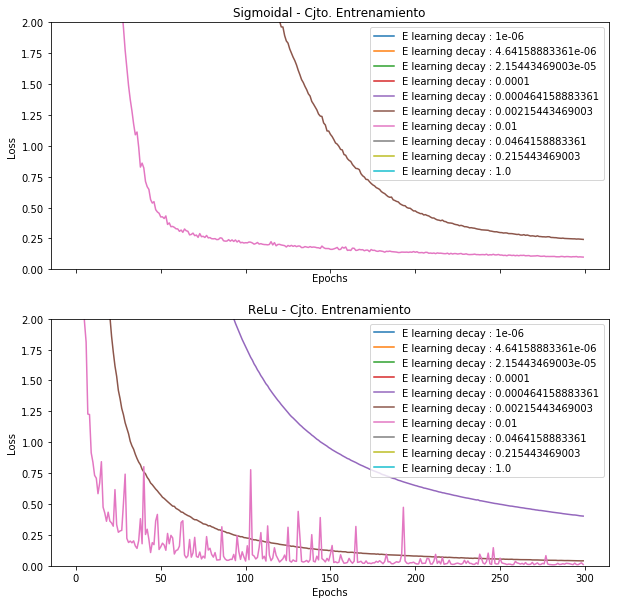

In [84]:
#se fija una semilla para poder generar una comparación
seed = 18
np.random.seed(seed)

plt.close('all')

f, axarr = plt.subplots(2, sharex=True,sharey =True,figsize=(10,10))

history = []
activation = ['sigmoid','relu']
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
sgd = SGD(lr=0.2, decay=1e-6)

for l_r in lear_decay:
    print("\n\nModelos con lr de, {0}".format(l_r))
    for a in activation:
        sgd = SGD(lr = l_r)
        model = create_model(a,sgd)
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], label = "E learning decay : "+str(l_r))
        else:
            axarr[1].plot(hisx.history['loss'], label = "E learning decay : "+str(l_r))

axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[0].set_title('Sigmoidal - Cjto. Entrenamiento')
axarr[1].set_title('ReLu - Cjto. Entrenamiento')
axarr[0].set_ylim(0,2)
axarr[1].set_ylim(0,2)
axarr[0].legend(loc='upper right')
axarr[1].legend(loc='upper right')
plt.show()


** Gráficos**

**Comentarios**

- En ambos casos el mejor comportamiento se obtiene para learning_decay = 0.01, seguido de 0.0021. Muchos valores no se encuentran presentes en la gráfica por valores indefinidos que entregan sus resultados.
- A pesar de tener el mejor comportamiento con los mismos valores, para el caso de Relu tiene un descenso mucho más rapido que para la función Sigmoid, logrando los primeros valores de MSE cercano a 0 entre los 50 y 100 epochos. No así para Sigmoid que se obtienen cerca de los 300 epochs.
- Con learning_decay = 0.01, para Relu tiene oscilaciones mucho mas pronunciadas que para el caso de Sigmoid, sin embargo pasado los 250 epochs se mantiene mucho mas estable.




### f) Entrene los modelos considerados en b) y c) utilizando SGD en mini-batches. Experimentación con diferentes tamaños del batch. 



Modelos con n_batches de, 1


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a4f57eeb8>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a4f3095c0>.


Modelos con n_batches de, 20


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a4f48e908>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a4f7c7f98>.


Modelos con n_batches de, 39


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a4f962320>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a4d6cb320>.


Modelos con n_batches de, 58


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a4dce2208>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a4df9add8>.


Modelos con n_batches de, 77


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a

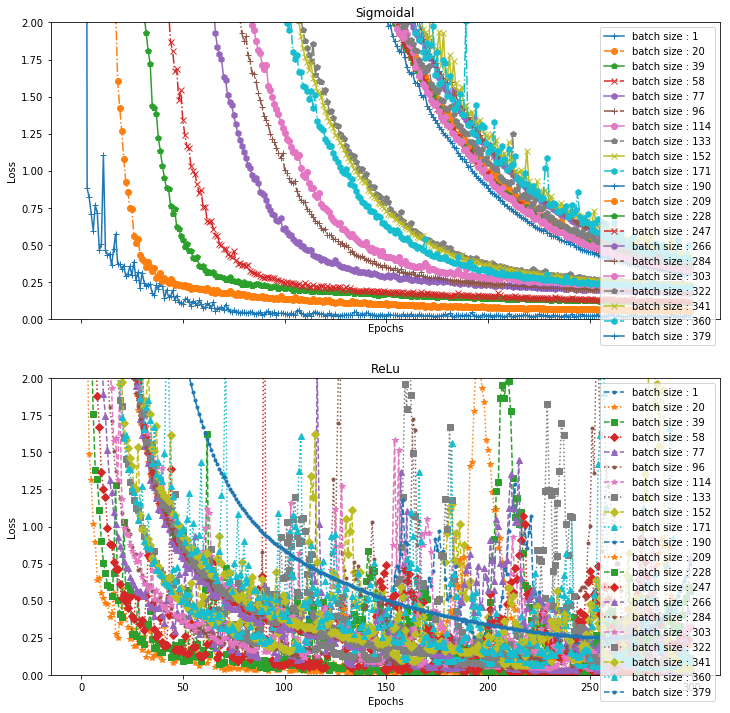

In [62]:
import matplotlib.pyplot as plt
from itertools import cycle

seed = 18
np.random.seed(seed)

plt.close('all')
f, axarr = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))  #antes 8,8

#Diferentes tamaños del batch
n_batches =  21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches)) 
batch_sizes=batch_sizes.astype(int)

##modelos de b) y c)
history = []
activation = ['sigmoid','relu']
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

m = ['+','.','o','*','p','s','x','D','h','^']
mcycler = cycle(m)

for n_b in batch_sizes:
    print("\n\nModelos con n_batches de, {0}\n".format(n_b))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model(a,sgd)
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(),batch_size=n_b, epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], marker = next(mcycler),linestyle = next(linecycler), label = "batch size : "+str(n_b))
        else:
            axarr[1].plot(hisx.history['loss'], marker = next(mcycler),linestyle = next(linecycler), label = "batch size : "+str(n_b))   
axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[0].set_title('Sigmoidal')
axarr[1].set_title('ReLu')
axarr[0].set_ylim(0,2)
axarr[1].set_ylim(0,2)
axarr[0].legend(loc='upper right')
axarr[1].legend(loc='upper right')
plt.show()


** Comentarios **

- Dada lo poco claro de los gráficos, es que se eligen los cuatro valores que tienen mejor desempeño y se grafican a continuación, para posterior análisis.



Modelos con n_batches de, 1


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a514d0c50>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a5405c320>.


Modelos con n_batches de, 20


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a52426ba8>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a52f1a438>.


Modelos con n_batches de, 39


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a53f82ba8>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a54248358>.


Modelos con n_batches de, 58


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a54397ac8>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a546e8390>.


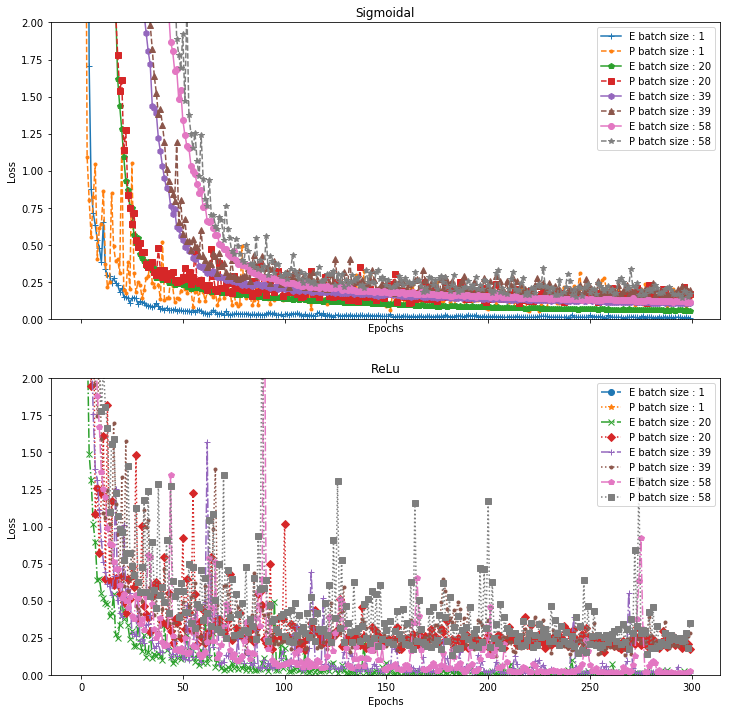

In [67]:
seed = 18
np.random.seed(seed)

plt.close('all')
f, axarr = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))  #antes 8,8

#Diferentes tamaños del batch
n_batches =  21
batch_sizes = [1,20,39, 58,360] #np.round(np.linspace(1,X_train_scaled.shape[0],n_batches)) 
#batch_sizes=batch_sizes.astype(int)

##modelos de b) y c)
history = []
activation = ['sigmoid','relu']
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

m = ['+','.','o','*','p','s','x','D','h','^']
mcycler = cycle(m)

for n_b in batch_sizes:
    print("\n\nModelos con n_batches de, {0}\n".format(n_b))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model(a,sgd)
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(),batch_size=n_b, epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], 
                          marker = next(mcycler),linestyle = next(linecycler), label = "E batch size : "+str(n_b))
            axarr[0].plot(hisx.history['val_loss'], 
                          marker = next(mcycler),linestyle = next(linecycler), label = "P batch size : "+str(n_b))
        else:
            axarr[1].plot(hisx.history['loss'], 
                          marker = next(mcycler),linestyle = next(linecycler), label = "E batch size : "+str(n_b))  
            axarr[1].plot(hisx.history['val_loss'], 
                          marker = next(mcycler),linestyle = next(linecycler), label = "P batch size : "+str(n_b))

print("\n\n\n E:Conjunto de Entrenamiento, P: Conjunto de Prueba\n")            
axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[0].set_title('Sigmoidal')
axarr[1].set_title('ReLu')
axarr[0].set_ylim(0,2)
axarr[1].set_ylim(0,2)
axarr[0].legend(loc='upper right')
axarr[1].legend(loc='upper right')
plt.show()



** Comentarios **

Los valores gráficados son los que más tiempo demoran, valores pequeños, que se explica por la forma de exploración para obtener el resultados, sin embargo son los que presentán mejor desepeño. También se muestra un valor grande de batch_size.

A pesar de que los valores pequeños para batch size permite  la convergencia de forma más rápida, los valores grandes entregan estimaciones precisas del gradiente pero convergen muy lentamente.

Para el caso de Sigmoid, el mejor resultado se obtiene con batch_size = 1, siendo mejor el resultado del conjunto de entrenamiento que el conjunto de prueba. Luego de los 250 epochs, los resulatados tienen similar comportamiento para el mismo valor de batch_size. Los resultados van empeorando a medida que aumenta el valor de batch_size.

Para el caso de Relu, el mejor resultado se obtiene par el conjunto de entrenamiento cuando batch_size = 20, le sigue batch_size = 58. Para el caso de prueba, los mejores valores son los mismos, pero con un desempeño un poco peor.

### g) Entrenando los modelos obtenidos en b) y c) utilizando estrategias modernas para adaptar la tasa de aprendizaje. 
 - adagrad
 - adadelta
 - RMSprop
 - adam
 



Modelos con , <keras.optimizers.SGD object at 0x1a646a2400>


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a646a2400>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a646a2400>.


Modelos con , <keras.optimizers.Adam object at 0x1a646fe630>


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.Adam object at 0x1a646fe630>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.Adam object at 0x1a646fe630>.


Modelos con , <keras.optimizers.RMSprop object at 0x1a646fe668>


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.RMSprop object at 0x1a646fe668>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.RMSprop object at 0x1a646fe668>.


Modelos con , <keras.optimizers.Adagrad object at 0x1a646fe6a0>


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.Adagrad object at 0x1a646fe6a0>.

Modelo con params: relu, mean_squared_error, <keras.optimizer

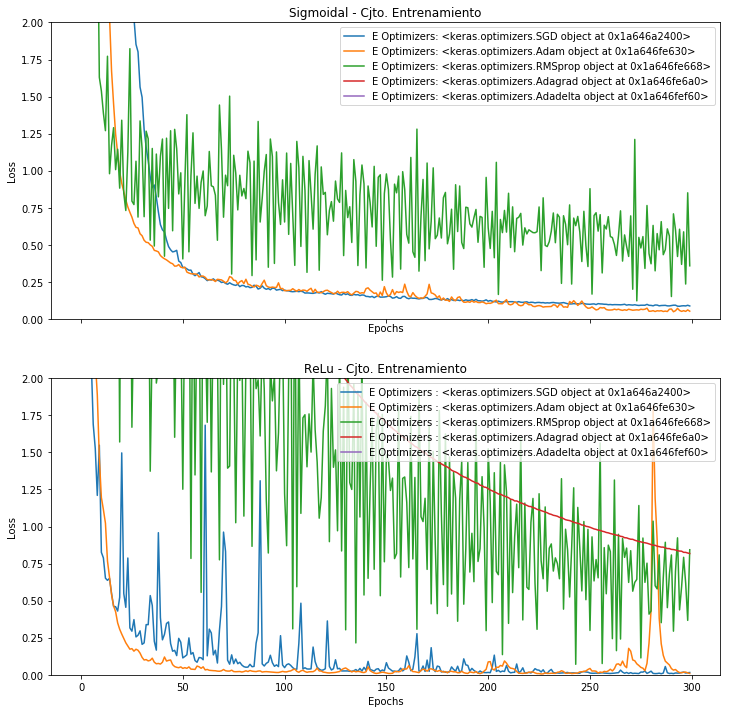

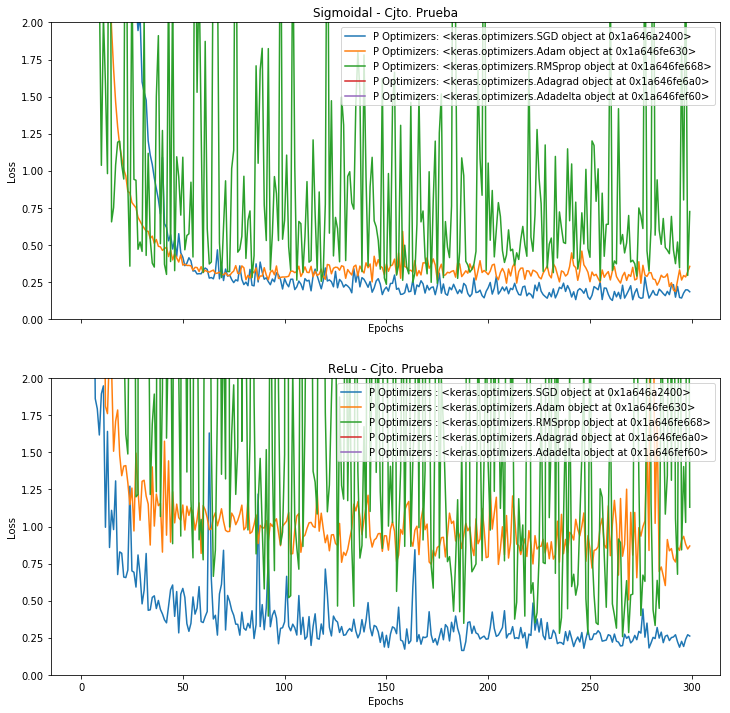

In [86]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta

seed = 18
np.random.seed(seed)

#moptimizer = Adagrad(lr=0.01)
#model.compile(optimizer=moptimizer)
#model.fit(X_train_scaled.as_matrix(),y_train.as_matrix()

plt.close('all')
f, axarr_train = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))

f1, axarr_test = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))

## Fijando la tasa de aprendizaje
sgd = SGD(lr = 0.01)
adam = Adam(lr=0.01)
rmsprop = RMSprop(lr=0.01)
adagrad = Adagrad(lr=0.01)
adadelta = Adadelta(lr=0.01)

optimizers = [sgd,adam,rmsprop,adagrad,adadelta]

#modelob 1 / FF 3 Capas I/H/O 200 neuronas en la oculta a/sigmoide
#sgd lr 0.01 epochs 300
#modeloc 2 / Igual al uno pero a/ReLu
history = []
activation = ['sigmoid','relu']

for moptimizer in optimizers:
    print("\n\nModelos con , {0}\n".format(moptimizer))
    for a in activation:
        model = create_model(a,moptimizer)
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr_train[0].plot(hisx.history['loss'], label = "E Optimizers: "+str(moptimizer))
            axarr_test[0].plot(hisx.history['val_loss'], label = "P Optimizers: "+str(moptimizer))
            
        else:
            axarr_train[1].plot(hisx.history['loss'], label = "E Optimizers : "+str(moptimizer))   
            axarr_test[1].plot(hisx.history['val_loss'], label = "P Optimizers : "+str(moptimizer))  

print("\n\nE: Conjunto de Entrenamiento, P: Conjunto de Prueba\n")
axarr_train[0].set_xlabel('Epochs')
axarr_train[0].set_ylabel('Loss')
axarr_train[1].set_xlabel('Epochs')
axarr_train[1].set_ylabel('Loss')
axarr_train[0].set_title('Sigmoidal - Cjto. Entrenamiento')
axarr_train[1].set_title('ReLu - Cjto. Entrenamiento')
axarr_train[0].set_ylim(0,2)
axarr_train[1].set_ylim(0,2)
axarr_train[0].legend(loc='upper right')
axarr_train[1].legend(loc='upper right')

axarr_test[0].set_xlabel('Epochs')
axarr_test[0].set_ylabel('Loss')
axarr_test[1].set_xlabel('Epochs')
axarr_test[1].set_ylabel('Loss')
axarr_test[0].set_title('Sigmoidal - Cjto. Prueba')
axarr_test[1].set_title('ReLu - Cjto. Prueba')
axarr_test[0].set_ylim(0,2)
axarr_test[1].set_ylim(0,2)
axarr_test[0].legend(loc='upper right')
axarr_test[1].legend(loc='upper right')
plt.show()
    

** Comentarios**

**¿Se observa en algún caso un mejor resultado final?**

Sí, el mejor resultado se obtiebe para Adam en el caso de Sigmoid y Relu, seguido de SGD.

**¿Se observa en algún caso una mayor velocidad de convergencia sobre el dataset de entrenamiento?**

La mayor velocidad de convergencia se obtiene para el caso de Relu con Adam, se produce antes de los 50 epochos. Para el caso de Sigmoid también es con Adam, sin embargo no converge tan rápido como con Relu.

**¿Sobre el dataset de pruebas?**
Para el Sigmoid inicialmente de produce con Adam, sin embargo luego SGD obtiene valores por debajo de los valores obtenidos con Adam. En ambos casos se produce cerca de los 50 epochs.

Para el caso de Relu, se produce con SGD, apesar de tener notorias oscilaciones.


### h) Utilizando regularizadores  l1 y  l2 (weight decay) para los modelos de b) y c)


In [12]:
from keras import regularizers
def create_model_L(activation, optimizer = 'adam', f_loss = 'mean_squared_error', regularizer = regularizers.l1(0.01)):
    # create model
    print("\nModelo con params: {0}, {1}, {2}.".format(activation,f_loss,optimizer))
    model = Sequential()  
    model.add(Dense(200, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation=activation,
                    kernel_regularizer = regularizer))
    # output layer
    model.add(Dense(1, kernel_initializer='uniform', activation = 'linear', kernel_regularizer = regularizer ))
    model.compile(optimizer = optimizer, loss = f_loss , metrics=['accuracy']) ## accuracy no debiese estar
    return model

def create_model_L1(activation, optimizer = 'adam', f_loss = 'mean_squared_error', regularizer = regularizers.l1(0.01)):
    # create model
    print("\nModelo con params: {0}, {1}, {2}.".format(activation,f_loss,optimizer))
    model = Sequential()  
    model.add(Dense(200, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation=activation, 
                    kernel_regularizer = regularizer))
    # output layer
    model.add(Dense(1, kernel_initializer='uniform', activation = 'linear' ))
    model.compile(optimizer = optimizer, loss = f_loss , metrics=['accuracy']) ## accuracy no debiese estar
    return model

def create_model_L2(activation, optimizer = 'adam', f_loss = 'mean_squared_error', regularizer = regularizers.l1(0.01)):
    # create model
    print("\nModelo con params: {0}, {1}, {2}.".format(activation,f_loss,optimizer))
    model = Sequential()  
    model.add(Dense(200, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation=activation))
    # output layer
    model.add(Dense(1, kernel_initializer='uniform', activation = 'linear', kernel_regularizer = regularizer ))
    model.compile(optimizer = optimizer, loss = f_loss , metrics=['accuracy']) ## accuracy no debiese estar
    return model



*******************************


Modelos con regularizador: l1=0.01 ambas capas


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a38245d30>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a390cae80>.

Modelos con regularizador: l2=0.01 ambas capas


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a373714a8>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a3915d5c0>.


*******************************

 Sin Regularizador


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a38245c50>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a39283940>.


*******************************


Modelos con regularizador: l1=0.01 a primera Capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a394b6c50>.

Modelo con params: relu, mean_squared_error, <keras.optimizer

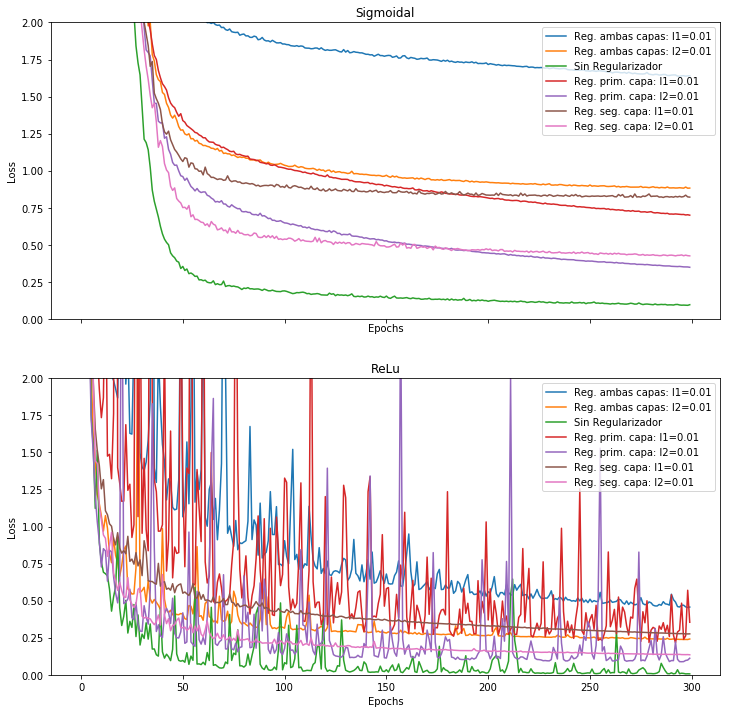

In [13]:
from keras import regularizers

seed = 18
np.random.seed(seed)

plt.close('all')
f, axarr = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))

#modelob 1 / FF 3 Capas I/H/O 200 neuronas en la oculta a/sigmoide
#sgd lr 0.01 epochs 300
#modeloc 2 / Igual al uno pero a/ReLu
history = []
activation = ['sigmoid','relu']
regs = [ ("l1=0.01", regularizers.l1(0.01)) ,  ("l2=0.01", regularizers.l2(0.01)) ]
print('\n\n*******************************\n')
for reg in regs:
    print("\nModelos con regularizador: {0} ambas capas\n".format(reg[0]))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_L(a,optimizer=sgd, regularizer=reg[1])
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], label = "Reg. ambas capas: "+str(reg[0]))
        else:
            axarr[1].plot(hisx.history['loss'], label = "Reg. ambas capas: "+str(reg[0])) 
            
print('\n\n*******************************\n')
print(' Sin Regularizador\n')
for a in activation:
    sgd = SGD(lr = 0.01)
    model = create_model(a,sgd)
    hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
    history.append(hisx)
    if (a == 'sigmoid'):
        axarr[0].plot(hisx.history['loss'], label = "Sin Regularizador")
    else:
        axarr[1].plot(hisx.history['loss'], label = "Sin Regularizador") 

print('\n\n*******************************\n')       
for reg in regs:
    print("\nModelos con regularizador: {0} a primera Capa\n".format(reg[0]))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_L1(a,optimizer=sgd, regularizer=reg[1])
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], label = "Reg. prim. capa: "+str(reg[0]))
        else:
            axarr[1].plot(hisx.history['loss'], label = "Reg. prim. capa: "+str(reg[0]))
            
print('\n\n*******************************\n')             
for reg in regs:
    print("\nModelos con regularizador: {0} a segunda capa\n".format(reg[0]))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_L2(a,optimizer=sgd, regularizer=reg[1])
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], label = "Reg. seg. capa: "+str(reg[0]))
        else:
            axarr[1].plot(hisx.history['loss'], label = "Reg. seg. capa: "+str(reg[0]))        
                    
        
axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[0].set_title('Sigmoidal')
axarr[1].set_title('ReLu')
axarr[0].set_ylim(0,2)
axarr[1].set_ylim(0,2)
axarr[0].legend(loc='upper right')
axarr[1].legend(loc='upper right')
plt.show()

**Comentarios**

Para la función Sigmoid el mejor resultado se obtiene sin regularizador en las capas. Se obtienen valores para mse menores a 0.25 al llegar a los 50 epochs.

Los siguientes mejores resultados se obtienen con regularizador l2, tanto en la primera y segunda capa. Inicialmente con regularizador en la segunda capa tiene valores menores para mse que en la primera capa. Sin embargo pasado los 150 epochs se obtiene mejores resultados con l2 en la primera capa.

En el caso de Relu, al igual que Sigmoid, los mejores resultados se obtienen sin regularizador en las capas. Le siguen los resultados obtenidos con regularizador l2 en la primera y segunda capa. Para ambos casos los valores de mse fluctúan en el mismo rango de valores, sin embargo, para el caso de regularizador en la primera capa el valor de mse presenta una amplitud mayor en las oscilaciones que cuando se aplica en la segunda capa.
Para todos los casos de Relu prueba se presentan oscilaciones.

** Experimentando con distintos valores del parámetro de regularización**



*******************************


 Regularizador a ambas capas



Modelos con regularizador l1 0.001


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a2cac4588>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a64d937f0>.


Modelos con regularizador l1 0.01


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a6652da58>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a6636cb00>.


Modelos con regularizador l1 0.1


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a66d0eb70>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a66f7bba8>.


Modelos con regularizador l2 0.001


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a67381ba8>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a67887da0>.


Modelos con regularizador l

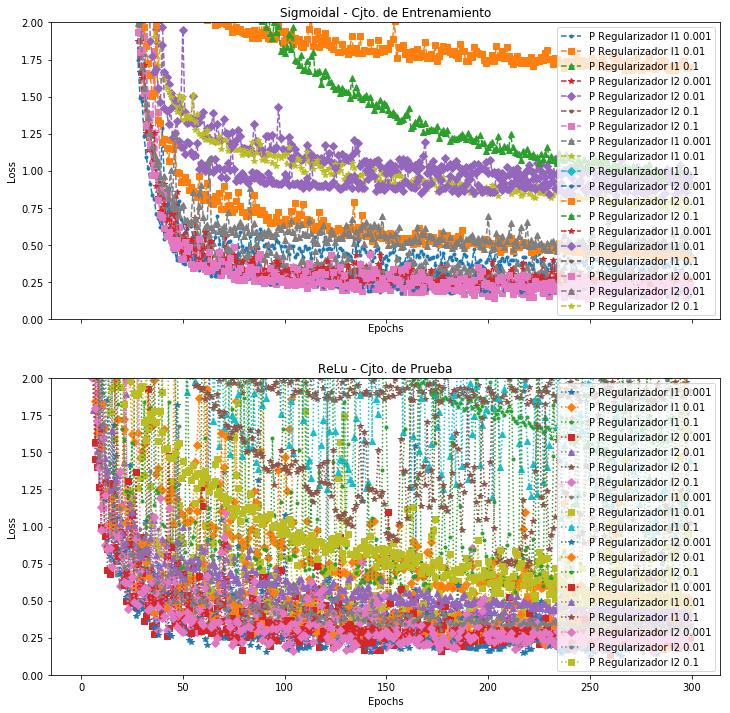

In [87]:
seed = 18
np.random.seed(seed)

plt.close('all')
f, axarr_train = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))

plt.close('all')
f, axarr_test = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))

#modelob 1 / FF 3 Capas I/H/O 200 neuronas en la oculta a/sigmoide
#sgd lr 0.01 epochs 300
#modeloc 2 / Igual al uno pero a/ReLu
history = []
activation = ['sigmoid','relu']

lines = ["-","--","-.",":"]
linecycler = cycle(lines)

m = ['+','.','o','*','p','s','x','D','h','^']
mcycler = cycle(m)

#regsL1 = [regularizers.l1(0.001), regularizers.l1(0.01),regularizers.l1(0.1)]
val_regs = [ ("l1 0.001", regularizers.l1(0.001)),
             ("l1 0.01" , regularizers.l1(0.01 )),
             ("l1 0.1"  , regularizers.l1(0.1  )),
             ("l2 0.001", regularizers.l2(0.001)),
             ("l2 0.01" , regularizers.l2(0.01 )),
             ("l2 0.1"  , regularizers.l2(0.1  )) ]

print('\n\n*******************************\n')
print('\n Regularizador a ambas capas\n')
for reg in val_regs:
    print("\n\nModelos con regularizador {0}\n".format(reg[0]))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_L(a,optimizer=sgd, regularizer=reg[1])
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr_train[0].plot(hisx.history['loss'],
                                marker = next(mcycler),linestyle = next(linecycler), label = "E Regularizador "+str(reg[0]))
            axarr_test[0].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler) , label = "P Regularizador "+str(reg[0]))
        else:
            axarr_train[1].plot(hisx.history['loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "E Regularizador "+str(reg[0])) 
            axarr_test[1].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "P Regularizador "+str(reg[0])) 
            
print('\n\n*******************************\n')
print('\nSin Regularizador\n')
for a in activation:
    sgd = SGD(lr = 0.01)
    model = create_model(a,sgd)
    hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
    history.append(hisx)
    if (a == 'sigmoid'):
            axarr_train[0].plot(hisx.history['loss'],
                                marker = next(mcycler),linestyle = next(linecycler), label = "E Regularizador "+str(reg[0]))
            axarr_test[0].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler) , label = "P Regularizador "+str(reg[0]))
    else:
            axarr_train[1].plot(hisx.history['loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "E Regularizador "+str(reg[0])) 
            axarr_test[1].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "P Regularizador "+str(reg[0])) 

       
print('\n\n*******************************\n')       
for reg in val_regs:
    print("\nModelos con regularizador: {0} a primera Capa\n".format(reg[0]))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_L1(a,optimizer=sgd, regularizer=reg[1])
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr_train[0].plot(hisx.history['loss'],
                                marker = next(mcycler),linestyle = next(linecycler), label = "E Regularizador "+str(reg[0]))
            axarr_test[0].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler) , label = "P Regularizador "+str(reg[0]))
        else:
            axarr_train[1].plot(hisx.history['loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "E Regularizador "+str(reg[0])) 
            axarr_test[1].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "P Regularizador "+str(reg[0])) 


            
print('\n\n*******************************\n')             
for reg in val_regs:
    print("\nModelos con regularizador: {0} a segunda capa\n".format(reg[0]))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_L2(a,optimizer=sgd, regularizer=reg[1])
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr_train[0].plot(hisx.history['loss'],
                                marker = next(mcycler),linestyle = next(linecycler), label = "E Regularizador "+str(reg[0]))
            axarr_test[0].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler) , label = "P Regularizador "+str(reg[0]))
        else:
            axarr_train[1].plot(hisx.history['loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "E Regularizador "+str(reg[0])) 
            axarr_test[1].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "P Regularizador "+str(reg[0])) 

  
                 
axarr_train[0].set_xlabel('Epochs')
axarr_train[0].set_ylabel('Loss')
axarr_train[1].set_xlabel('Epochs')
axarr_train[1].set_ylabel('Loss')
axarr_train[0].set_title('Sigmoidal - Cjto. de Entrenamiento')
axarr_train[1].set_title('ReLu - Cjto. de Prueba')
axarr_train[0].set_ylim(0,2)
axarr_train[1].set_ylim(0,2)
axarr_train[0].legend(loc='upper right')
axarr_train[1].legend(loc='upper right')

axarr_test[0].set_xlabel('Epochs')
axarr_test[0].set_ylabel('Loss')
axarr_test[1].set_xlabel('Epochs')
axarr_test[1].set_ylabel('Loss')
axarr_test[0].set_title('Sigmoidal - Cjto. de Entrenamiento')
axarr_test[1].set_title('ReLu - Cjto. de Prueba')
axarr_test[0].set_ylim(0,2)
axarr_test[1].set_ylim(0,2)
axarr_test[0].legend(loc='upper right')
axarr_test[1].legend(loc='upper right')

plt.show()

**Comentarios**

**Experimentando con distintos valores del parámetro de regularización y evaluando el efecto de regularizar solo la primera capa vs la segunda*

Dada los complejo de determinar los resultados es que se acota la búsqueda de acuerdo a los mejores resultados obtenidos cuando el regularizador es 0.01





*******************************


 Regularizador a ambas capas



Modelos con regularizador l2 0.001


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a70c389e8>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a71658b38>.


Modelos con regularizador l2 0.01


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a716c2f60>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a71a97208>.


Modelos con regularizador l2 0.1


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a70549400>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a730235c0>.


*******************************


Sin Regularizador


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a63d94080>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a738e6ef0>.


**********

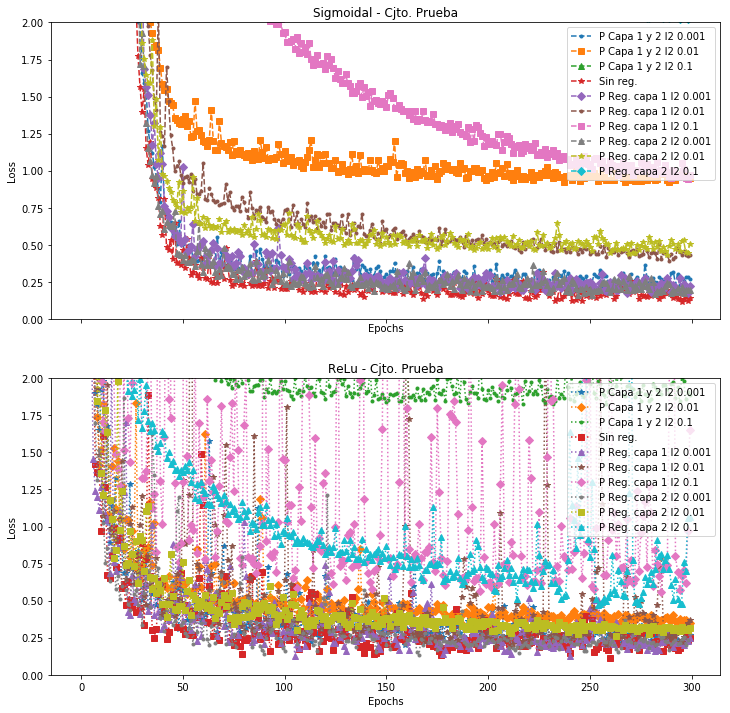

In [91]:
seed = 18
np.random.seed(seed)

plt.close('all')
f, axarr_train = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))

plt.close('all')
f, axarr_test = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))

#modelob 1 / FF 3 Capas I/H/O 200 neuronas en la oculta a/sigmoide
#sgd lr 0.01 epochs 300
#modeloc 2 / Igual al uno pero a/ReLu
history = []
activation = ['sigmoid','relu']

lines = ["-","--","-.",":"]
linecycler = cycle(lines)

m = ['+','.','o','*','p','s','x','D','h','^']
mcycler = cycle(m)

#regsL1 = [regularizers.l1(0.001), regularizers.l1(0.01),regularizers.l1(0.1)]
val_regs = [ ("l2 0.001", regularizers.l2(0.001)),
             ("l2 0.01" , regularizers.l2(0.01 )),
             ("l2 0.1"  , regularizers.l2(0.1  )) ]

print('\n\n*******************************\n')
print('\n Regularizador a ambas capas\n')
for reg in val_regs:
    print("\n\nModelos con regularizador {0}\n".format(reg[0]))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_L(a,optimizer=sgd, regularizer=reg[1])
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr_train[0].plot(hisx.history['loss'],
                                marker = next(mcycler),linestyle = next(linecycler), label = "E Reg. Capa 1 y 2 "+str(reg[0]))
            axarr_test[0].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler) , label = "P Capa 1 y 2 "+str(reg[0]))
        else:
            axarr_train[1].plot(hisx.history['loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "E Capa 1 y 2 "+str(reg[0])) 
            axarr_test[1].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "P Capa 1 y 2 "+str(reg[0])) 
            
print('\n\n*******************************\n')
print('\nSin Regularizador\n')
for a in activation:
    sgd = SGD(lr = 0.01)
    model = create_model(a,sgd)
    hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
    history.append(hisx)
    if (a == 'sigmoid'):
            axarr_train[0].plot(hisx.history['loss'],
                                marker = next(mcycler),linestyle = next(linecycler), label = "Sin reg.")
            axarr_test[0].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler) , label = "Sin reg.")
    else:
            axarr_train[1].plot(hisx.history['loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "Sin reg.") 
            axarr_test[1].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "Sin reg.") 

       
print('\n\n*******************************\n')       
for reg in val_regs:
    print("\nModelos con regularizador: {0} a primera Capa\n".format(reg[0]))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_L1(a,optimizer=sgd, regularizer=reg[1])
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr_train[0].plot(hisx.history['loss'],
                                marker = next(mcycler),linestyle = next(linecycler), label = "E Reg. capa 1 "+str(reg[0]))
            axarr_test[0].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler) , label = "P Reg. capa 1 "+str(reg[0]))
        else:
            axarr_train[1].plot(hisx.history['loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "E Reg. capa 1 "+str(reg[0])) 
            axarr_test[1].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "P Reg. capa 1 "+str(reg[0])) 


            
print('\n\n*******************************\n')             
for reg in val_regs:
    print("\nModelos con regularizador: {0} a segunda capa\n".format(reg[0]))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_L2(a,optimizer=sgd, regularizer=reg[1])
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr_train[0].plot(hisx.history['loss'],
                                marker = next(mcycler),linestyle = next(linecycler), label = "E Reg. capa 2 "+str(reg[0]))
            axarr_test[0].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler) , label = "P Reg. capa 2 "+str(reg[0]))
        else:
            axarr_train[1].plot(hisx.history['loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "E Reg. capa 2 "+str(reg[0])) 
            axarr_test[1].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "P Reg. capa 2 "+str(reg[0])) 
            
print("\n\nE: Conjunto de Entrenamiento, P: Conjunto de Prueba\n")
axarr_train[0].set_xlabel('Epochs')
axarr_train[0].set_ylabel('Loss')
axarr_train[1].set_xlabel('Epochs')
axarr_train[1].set_ylabel('Loss')
axarr_train[0].set_title('Sigmoidal - Cjto. Entrenamiento')
axarr_train[1].set_title('ReLu - Cjto. Entrenamiento')
axarr_train[0].set_ylim(0,2)
axarr_train[1].set_ylim(0,2)
axarr_train[0].legend(loc='upper right')
axarr_train[1].legend(loc='upper right')

axarr_test[0].set_xlabel('Epochs')
axarr_test[0].set_ylabel('Loss')
axarr_test[1].set_xlabel('Epochs')
axarr_test[1].set_ylabel('Loss')
axarr_test[0].set_title('Sigmoidal - Cjto. Prueba')
axarr_test[1].set_title('ReLu - Cjto. Prueba')
axarr_test[0].set_ylim(0,2)
axarr_test[1].set_ylim(0,2)
axarr_test[0].legend(loc='upper right')
axarr_test[1].legend(loc='upper right')
plt.show()

**Comentarios**

**Experimentando con distintos valores del parámetro de regularización y evaluando el efecto de regularizar solo la primera capa vs la segunda*

Para el caso del conjunto de prueba, sin regularizador tiene mejor desepeño para ambas funciones de activación. Seguido del valor 0.001. La diferencia para las funciones está que para relu llega a valores para mse = 0.25 cerca de los 50 epochs, mientrás que para Sigmoid ocurre entre 100 y 150 epochs.

### i) Entrenando los modelos de b) y c) utilizando *Dropout*.

In [15]:
seed = 18
np.random.seed(seed)
from keras.layers import Dropout

def create_model_dropout(activation, optimizer = 'adam', f_loss = 'mean_squared_error', drop_o = 0.2):
    # create model
    print("\nModelo con params: {0}, {1}, {2}.".format(activation,f_loss,optimizer))
    model = Sequential()  
    model.add(Dense(200, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation=activation))
    model.add(Dropout(drop_o))
    # output layer
    model.add(Dense(1, kernel_initializer='uniform', activation = 'linear'))
    model.compile(optimizer = optimizer, loss = f_loss , metrics=['accuracy']) ## accuracy no debiese estar
    return model

**Con dropout = 0.02**


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a3e281048>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a41a00d68>.

Sin Dropout


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a418a2400>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a367a3748>.


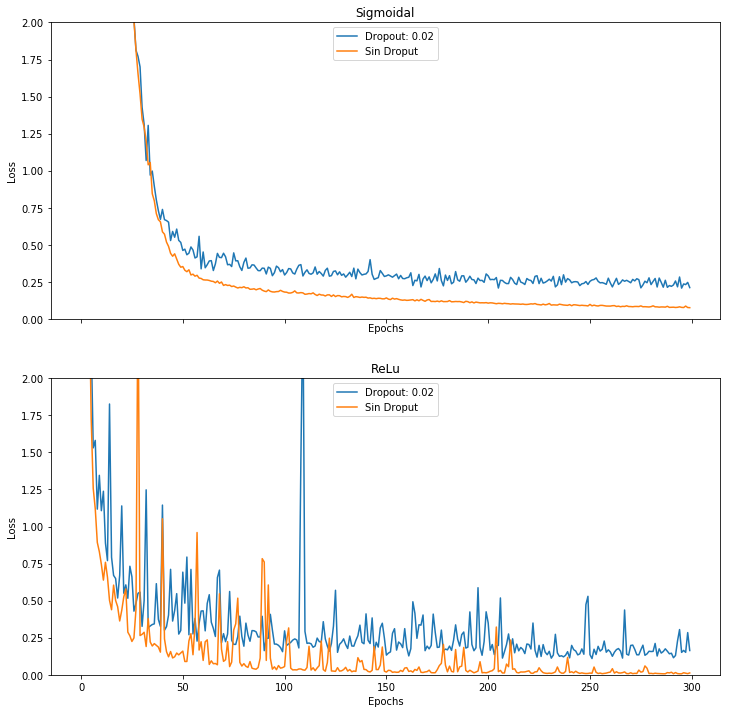

In [16]:
plt.close('all')
f, axarr = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))
d = 0.02
for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_dropout(a,optimizer=sgd,drop_o=d)
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], label = "Dropout: "+str(d))
        else:
            axarr[1].plot(hisx.history['loss'], label = "Dropout: "+str(d))
print('\nSin Dropout\n')
for a in activation:
    sgd = SGD(lr = 0.01)
    model = create_model(a,sgd)
    hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
    history.append(hisx)
    if (a == 'sigmoid'):
        axarr[0].plot(hisx.history['loss'], label = "Sin Droput")
    else:
        axarr[1].plot(hisx.history['loss'], label = "Sin Droput")             
                     
axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[0].set_title('Sigmoidal')
axarr[1].set_title('ReLu')
axarr[0].set_ylim(0,2)
axarr[1].set_ylim(0,2)
axarr[0].legend(loc='upper center')
axarr[1].legend(loc='upper center')
plt.show()


**Comentarios de desempeño antes y después de regularizar con dropout = 0.02**

Con dropout = 0.2, tanto para la función Relu como Sigmoid se obsevan mejores resultados sin dropout. En el caso de Relu se obtienen valores cercamos a cero cerca de los 100 epochs. Mientrás que para Sigmoid esto ocurre después de los 250 epochs.

En ambos casos se presentan oscilaciones, siendo mucho mayores para el caso de Relu.


**Experimentando con distintos valores del parámetro de regularización**


Modelos con Dropout 0.01


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a43727d68>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a4256f550>.

Modelos con Dropout 0.15


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a42684f28>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a42c47f60>.

Modelos con Dropout 0.2


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a42b8add8>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a431f8550>.

Modelos con Dropout 0.25


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a4360dcf8>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a42e1a8d0>.

Modelos con Dropout 0.3


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a43a65ef0>.

Modelo con par

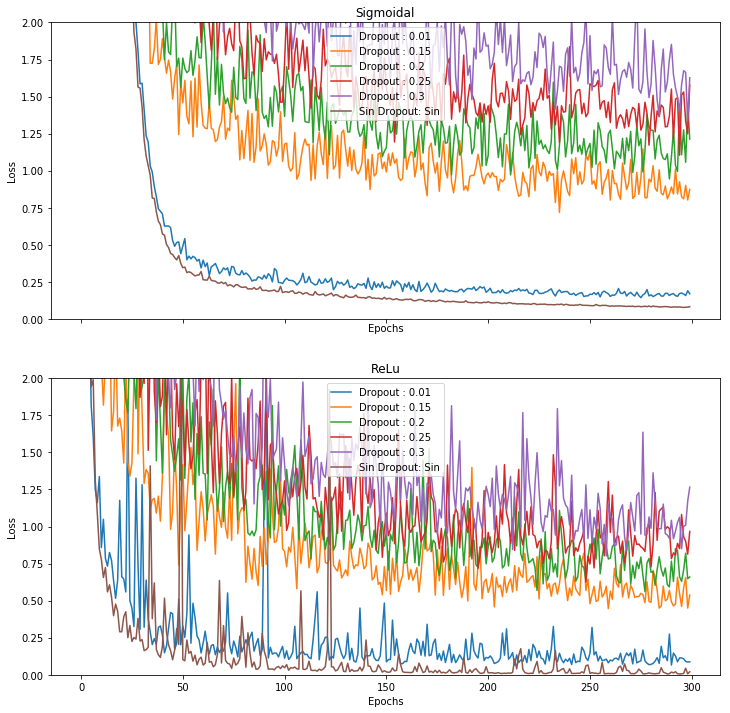

In [17]:
plt.close('all')
f, axarr = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))


reg_dropout = [0.01,0.15,0.2,0.25,0.3]

for d in reg_dropout:
    print("\nModelos con Dropout {0}\n".format(d))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_dropout(a,optimizer=sgd,drop_o=d)
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], label = "Dropout : "+str(d))
        else:
            axarr[1].plot(hisx.history['loss'], label = "Dropout : "+str(d))

print('\nSin Dropout\n')
for a in activation:
    sgd = SGD(lr = 0.01)
    model = create_model(a,sgd)
    hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
    history.append(hisx)
    if (a == 'sigmoid'):
        axarr[0].plot(hisx.history['loss'], label = "Sin Dropout: "+str('Sin'))
    else:
        axarr[1].plot(hisx.history['loss'], label = "Sin Dropout: "+str('Sin'))             
                     
axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[0].set_title('Sigmoidal')
axarr[1].set_title('ReLu')
axarr[0].set_ylim(0,2)
axarr[1].set_ylim(0,2)
axarr[0].legend(loc='upper center')
axarr[1].legend(loc='upper center')
plt.show()

**Comentarios**
- Se experimento con valores para dropout de 0.01, 0.15, 0.2, 0.25, 0.3.
- Tanto para la función Sigmoid como Relu los mejores desempeños se obtienen sin dropout.
- Para el caso de Sigmoid, con valores 0.01 y y sin dropout se obtienen resultados muy similares, sin embargo para los otros valores no bajan de valor mse 0.75 en los 300 epochs.
- Para Relu, sucede muy similar a lo anterior. Se diferencian en las oscilaciones y que para los valores 0.15, 0.2, 0.25 y 0.3 los resultados no bajan de valor mse 0.5  al llegar a los 300 epochs.


####  j) Fijando todos los demás hiper-parámetros del modelo definido en b) y en c), utilice validación cruzada con un número de folds igual a K = 5 y K=10 para determinar el mejor valor correspondiente a un parámetro que usted elija (tasa de aprendizaje, número de neuronas, parámetro de regularización, etc) ¿El mejor parámetro para la red con sigmoidal es distinto que para ReLU? ¿Porqué sucede? Además mida el error real del modelo sobre el conjunto de pruebas, compare y concluya. 

In [ ]:
def create_model(activation, optimizer = 'adam', f_loss = 'mean_squared_error'):
    # create model
    print("\nModelo con params: {0}, {1}, {2}.".format(activation,f_loss,optimizer))
    model = Sequential()  
    model.add(Dense(200, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation=activation))
    # output layer
    model.add(Dense(1, kernel_initializer='uniform', activation = 'linear'))
    model.compile(optimizer = optimizer, loss = f_loss , metrics=['accuracy']) ## accuracy no debiese estar
    return model